In [4]:
import pandas as pd
#abro y leo el archivo de data
df=pd.read_csv('dataun14-23.csv')
df.tail()

,Date,T_agua,T_aire,RH_aire,DP_aire
173670,2024-01-02 06:30:00,21.08,22.54,89.4,20.73
173671,2024-01-02 07:00:00,21.10,22.49,89.8,20.76
173672,2024-01-02 07:30:00,21.13,22.58,90.0,20.89
173673,2024-01-02 08:00:00,21.17,22.92,89.1,21.06
173674,2024-01-02 08:30:00,21.17,23.66,86.1,21.23


In [5]:
from datetime import datetime

#Tenemos que convertir los valores string que se cargan por default al leer un csv a fomato fecha para que asi datetime lo 
#pueda leer
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')

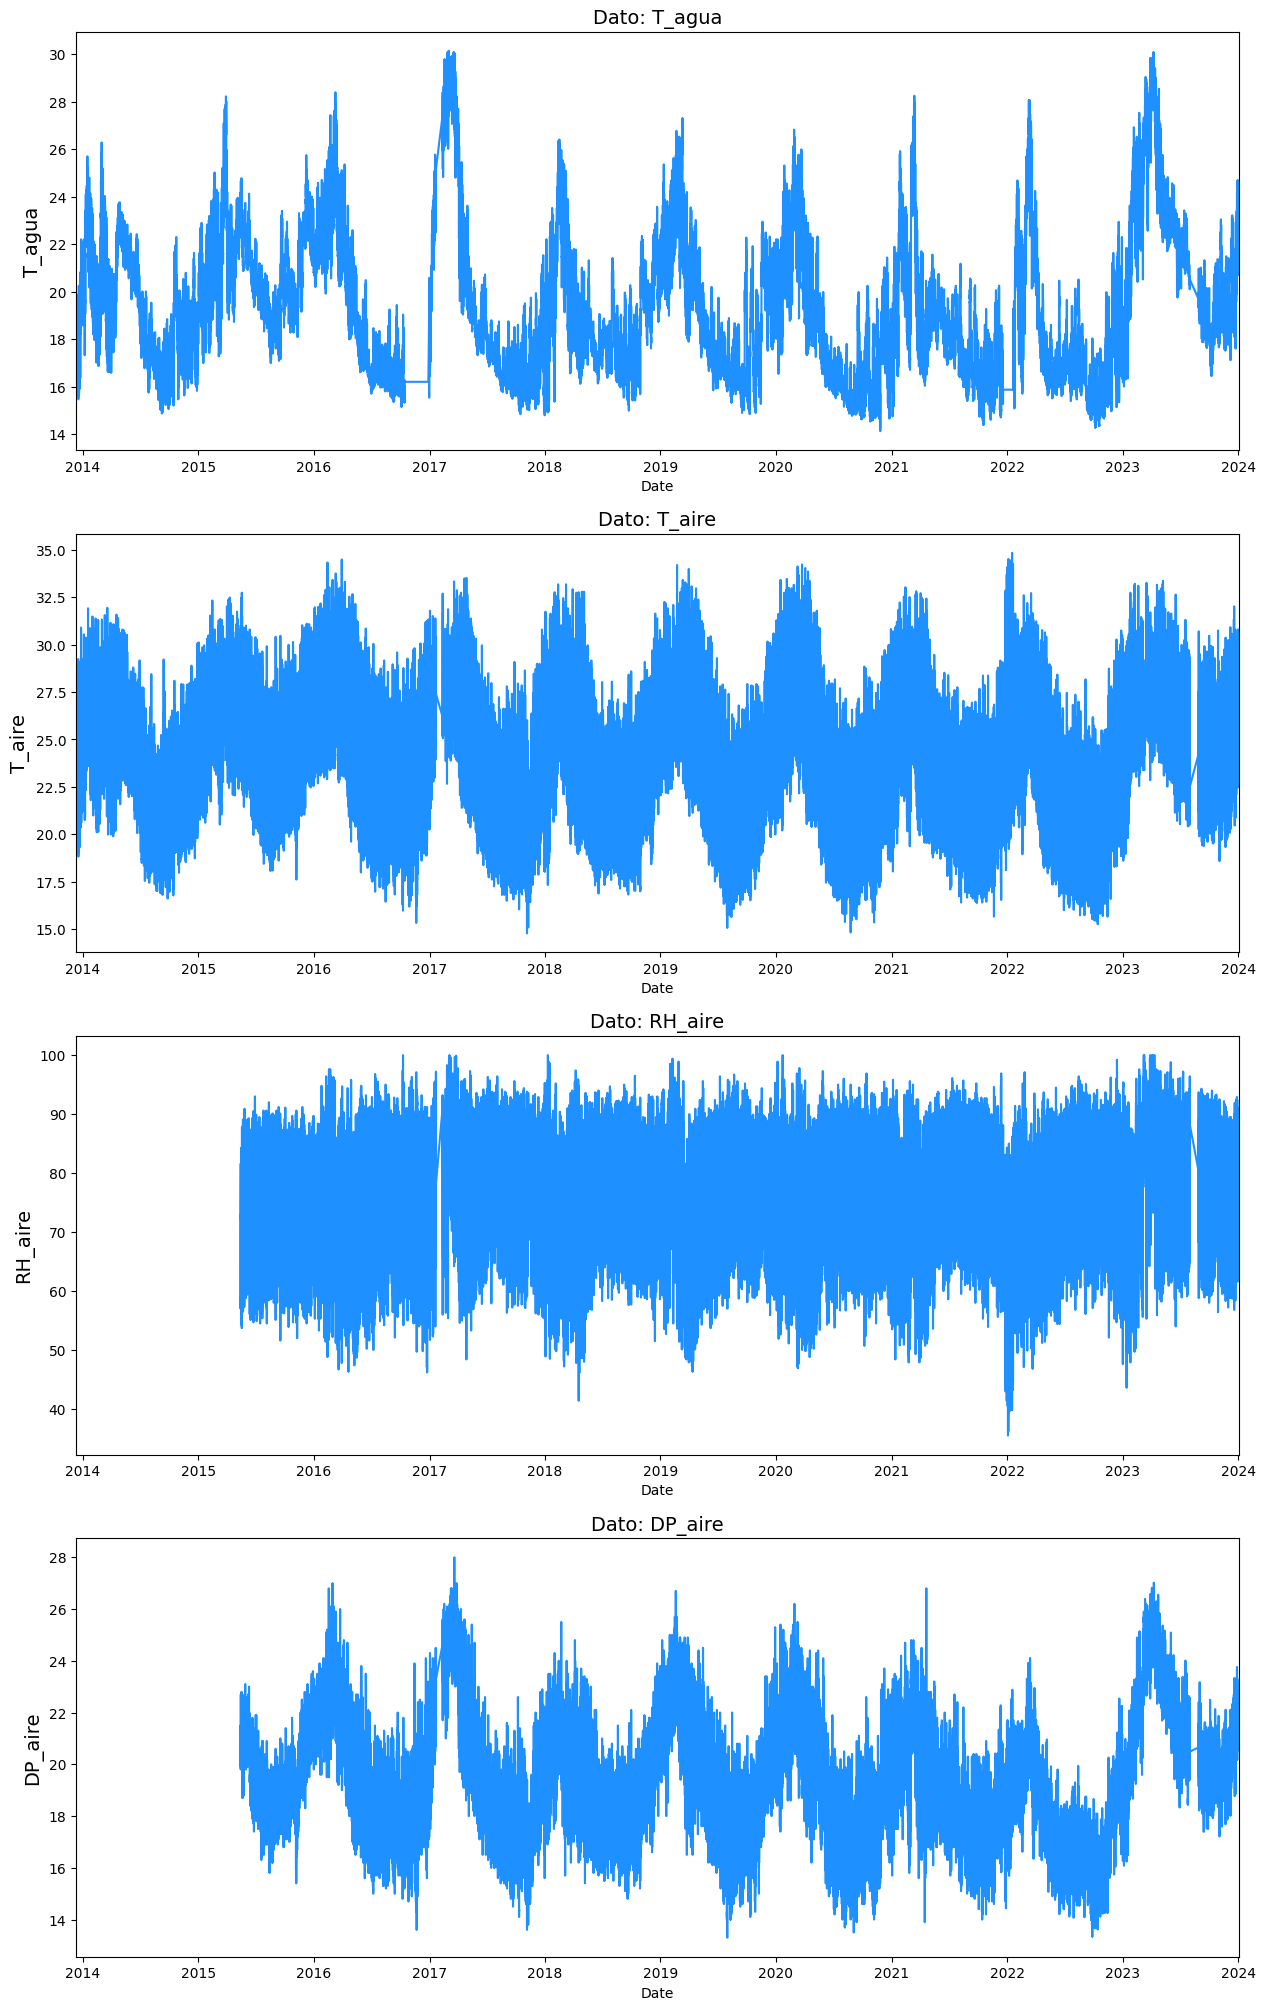

In [6]:
# En caso falten datos, estos se completaran usando: y=df[column].fillna(method='ffill')
import matplotlib.pyplot as plt # Visualization
import seaborn as sns 
#Determinamos el numero de columnas,filas y tamaño de la figura que plotearemos
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))
#Por cada valor i cogeremos las columnas correspondientes('T_agua'(1),'T_aire'(2),...)
for i, column in enumerate(df.drop('Date', axis=1).columns):
    #Graficamos la curva con valores 'Date' en el eje x y los valores de la columna [i], ademas rellenamos valores con el metodo
    #'ffill', dicha curva se encontrara entre un intervalo de tiempo que se especificara despues, tambien se le da color azul
    sns.lineplot(x=df['Date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    #Aca le damos un titulo a cada grafica acorde al valor de i, con tamaño de letra 14
    ax[i].set_title('Dato: {}'.format(column), fontsize=14)
    #Le damos nombre del eje y conforme al valor i que reciba la funcion for
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    
    #determinamos los limites de x, como es fecha. le debemos dar limites en el formato fecha especificado en el paso previo
    ax[i].set_xlim([datetime(2013, 12, 10, 16, 0, 0), datetime(2024, 1, 2, 8, 30, 0)])

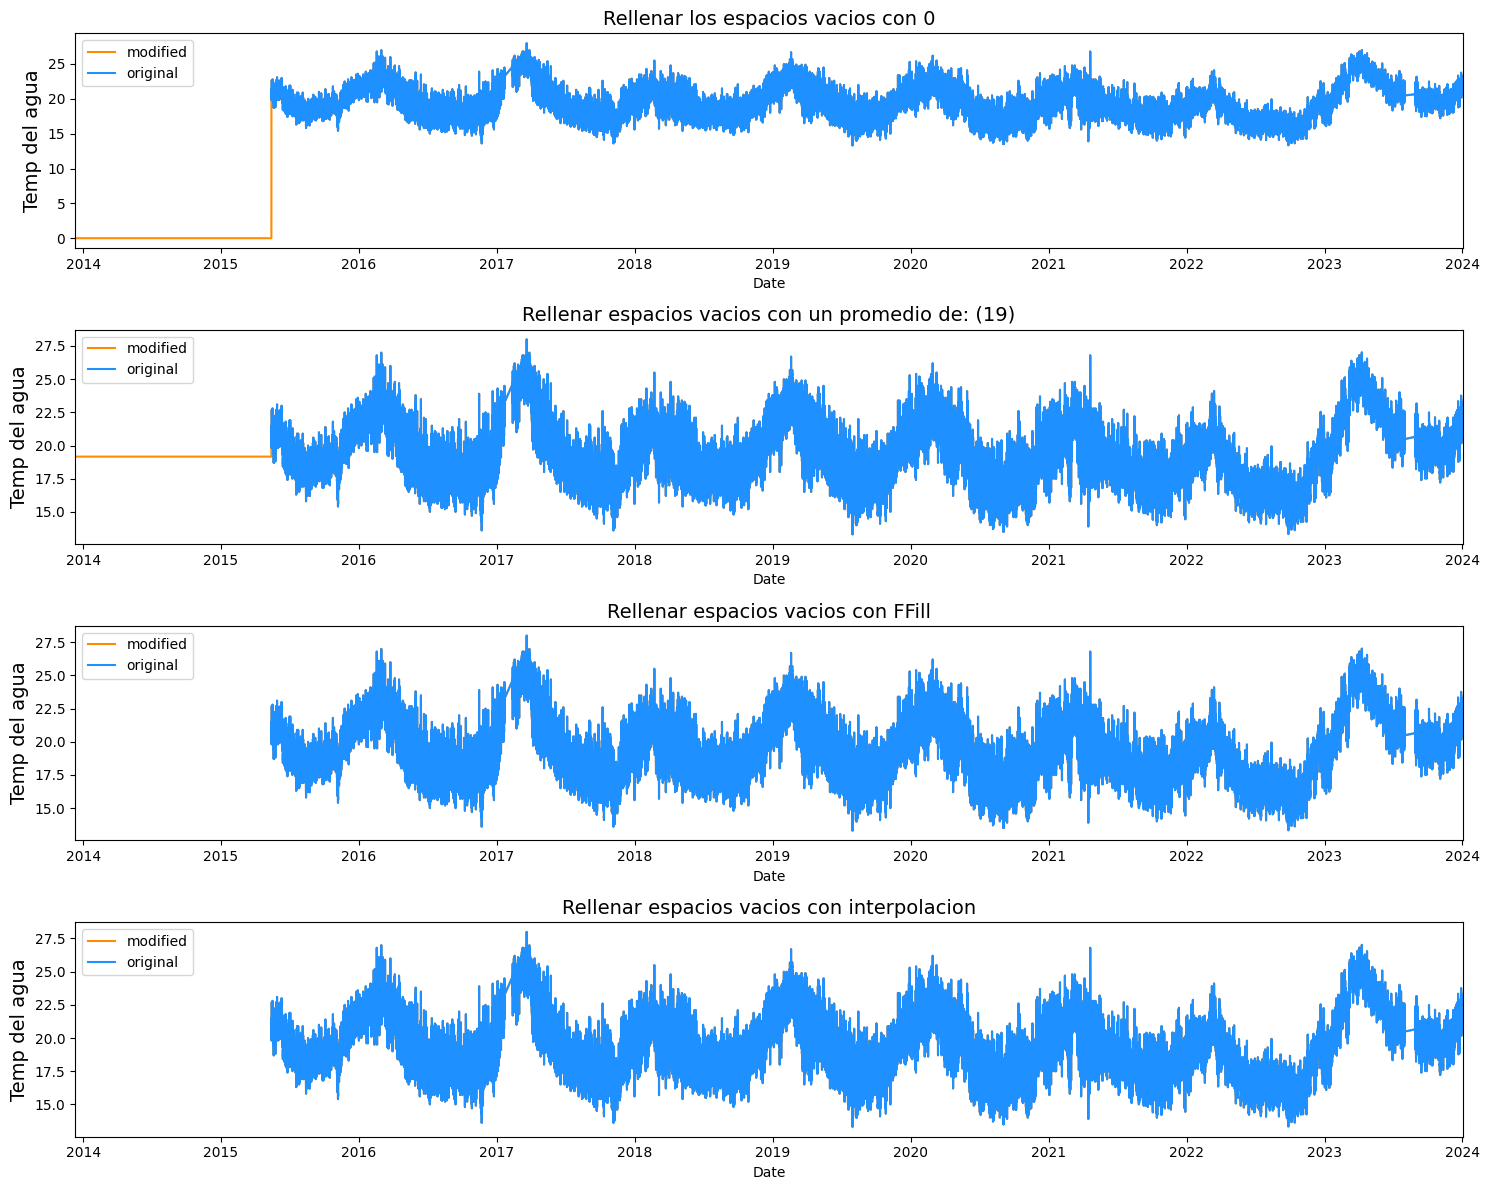

In [10]:
import numpy as np
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

sns.lineplot(x=df['Date'], y=df['DP_aire'].fillna(0), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=df['Date'], y=df['DP_aire'].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title('Rellenar los espacios vacios con 0', fontsize=14)
ax[0].set_ylabel(ylabel='Temp del agua', fontsize=14)

valor_medio = df['T_agua'].mean()
sns.lineplot(x=df['Date'], y=df['DP_aire'].fillna(valor_medio), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=df['Date'], y=df['DP_aire'].fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'Rellenar espacios vacios con un promedio de: ({valor_medio:.0f})', fontsize=14)
ax[1].set_ylabel(ylabel='Temp del agua', fontsize=14)

sns.lineplot(x=df['Date'], y=df['DP_aire'].ffill(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=df['Date'], y=df['DP_aire'].fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title('Rellenar espacios vacios con FFill', fontsize=14)
ax[2].set_ylabel(ylabel='Temp del agua', fontsize=14)

sns.lineplot(x=df['Date'], y=df['DP_aire'].interpolate(), ax=ax[3], color='darkorange', label = 'modified')
sns.lineplot(x=df['Date'], y=df['DP_aire'].fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
ax[3].set_title('Rellenar espacios vacios con interpolacion', fontsize=14)
ax[3].set_ylabel(ylabel='Temp del agua', fontsize=14)

for i in range(4):
    ax[i].set_xlim([datetime(2013, 12, 10, 16, 0, 0), datetime(2024, 1, 2, 8, 30, 0)])
    
plt.tight_layout()
plt.show()

In [8]:
#esta funcion solo debe usarse en caso tu data de 'Date' este desordenada: df = df.sort_values(by='Date')
#creo una nueva columna, donde calculo de cuanto es el intervalo (Horas, minutos,dias, meses, años???) entre los datos 'Date'
df['delta'] = df['Date'] - df['Date'].shift(1)
#muestro las columnas de interes: ('Date' y 'delta')
df[['Date', 'delta']].head()

,Date,delta
0,2013-12-10 16:00:00,NaT
1,2013-12-10 16:30:00,0 days 00:30:00
2,2013-12-10 17:00:00,0 days 00:30:00
3,2013-12-10 17:30:00,0 days 00:30:00
4,2013-12-10 18:00:00,0 days 00:30:00


In [9]:
#suma todos los valores de la columna delta y contamos el numero de elementos
df['delta'].sum(), df['delta'].count()

(Timedelta('3674 days 16:30:00'), 173674)

In [10]:
#borramos la columna de delta,porque no la usaremo
df = df.drop('delta', axis=1)
#contamos el numero de elementos nulos de cada columna de datos
df.isna().sum()

Date           0
T_agua      4882
T_aire        14
RH_aire    24955
DP_aire    24955
dtype: int64

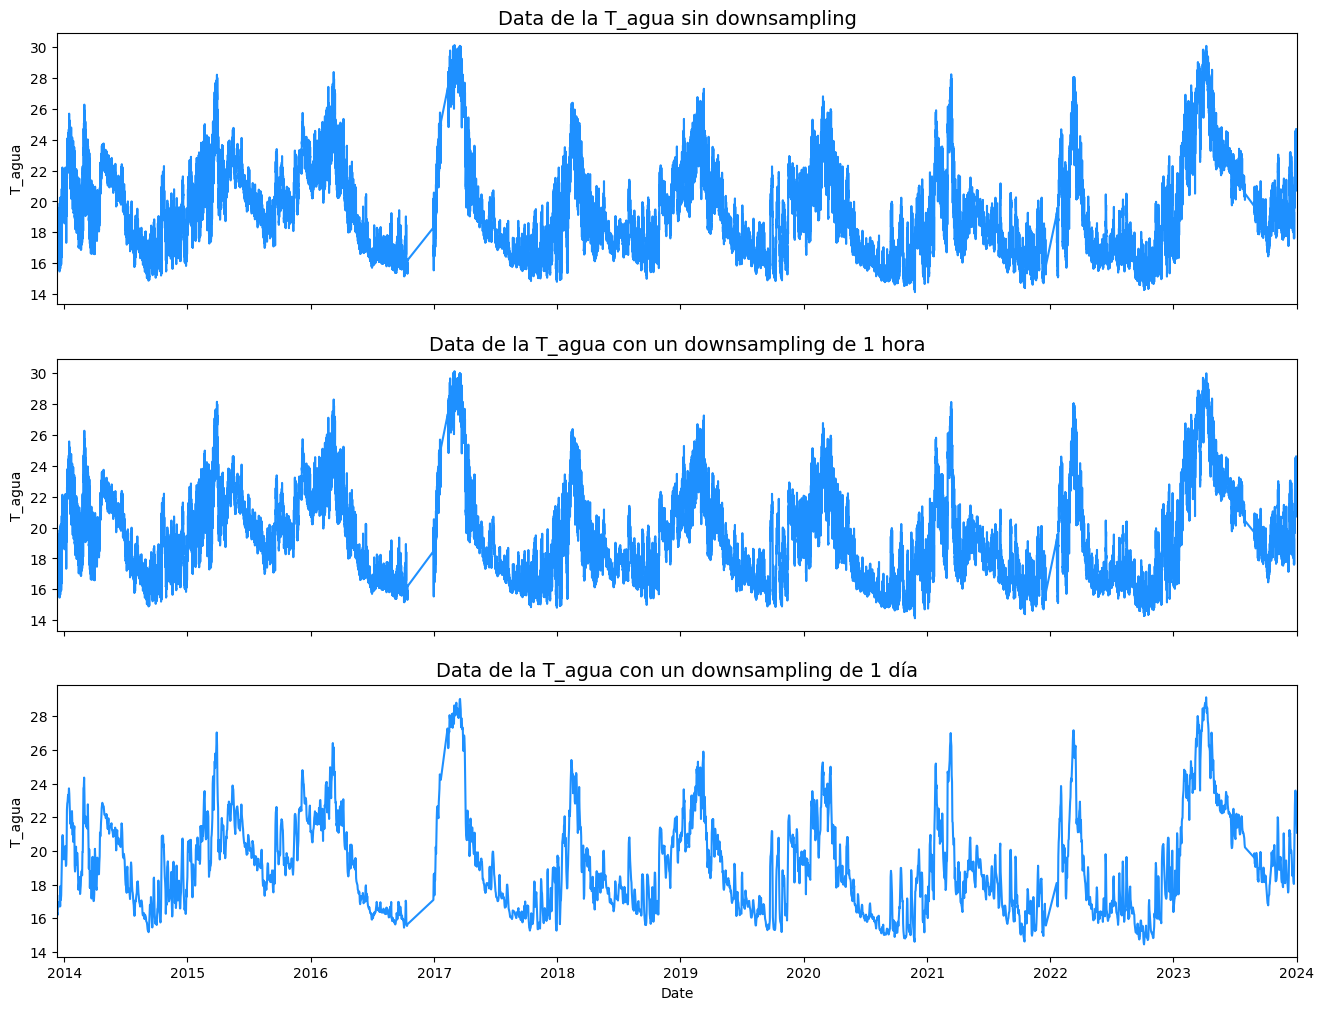

In [12]:
#Graficamos como seria aplicar un downsample de 1 hora o de 1 dia a la data

#Determinamos la configuracion de la figura por plotear (este paso se repite 4 veces)
fig, ax = plt.subplots(ncols=1, nrows=3, sharex=True, figsize=(16,12))

#////////Graficamos la curva original de la data['T_agua']////////
sns.lineplot(x=df['Date'], y=df['T_agua'],ax=ax[0],color='dodgerblue')
ax[0].set_title('Data de la T_agua sin downsampling', fontsize=14)

#Graficamos la curva de la data['T_agua'] con un downsampling de 1 hora
resampled_df = df[['Date','T_agua']].resample('H', on='Date').mean().reset_index(drop=False)
sns.lineplot(x=resampled_df['Date'], y=resampled_df['T_agua'], color='dodgerblue', ax=ax[1])
ax[1].set_title('Data de la T_agua con un downsampling de 1 hora', fontsize=14)

#Graficamos la curva de la data['T_agua'] con un downsampling de 1 día
resampled_df = df[['Date','T_agua']].resample('D', on='Date').mean().reset_index(drop=False)
sns.lineplot(x=resampled_df['Date'], y=resampled_df['T_agua'], color='dodgerblue', ax=ax[2])
ax[2].set_title('Data de la T_agua con un downsampling de 1 día', fontsize=14)

#Le damos un rango de limite al eje X
for i in range(3):
    ax[i].set_xlim([datetime(2013, 12, 10, 16, 0, 0), datetime(2024, 1, 2, 8, 30, 0)])
plt.show()

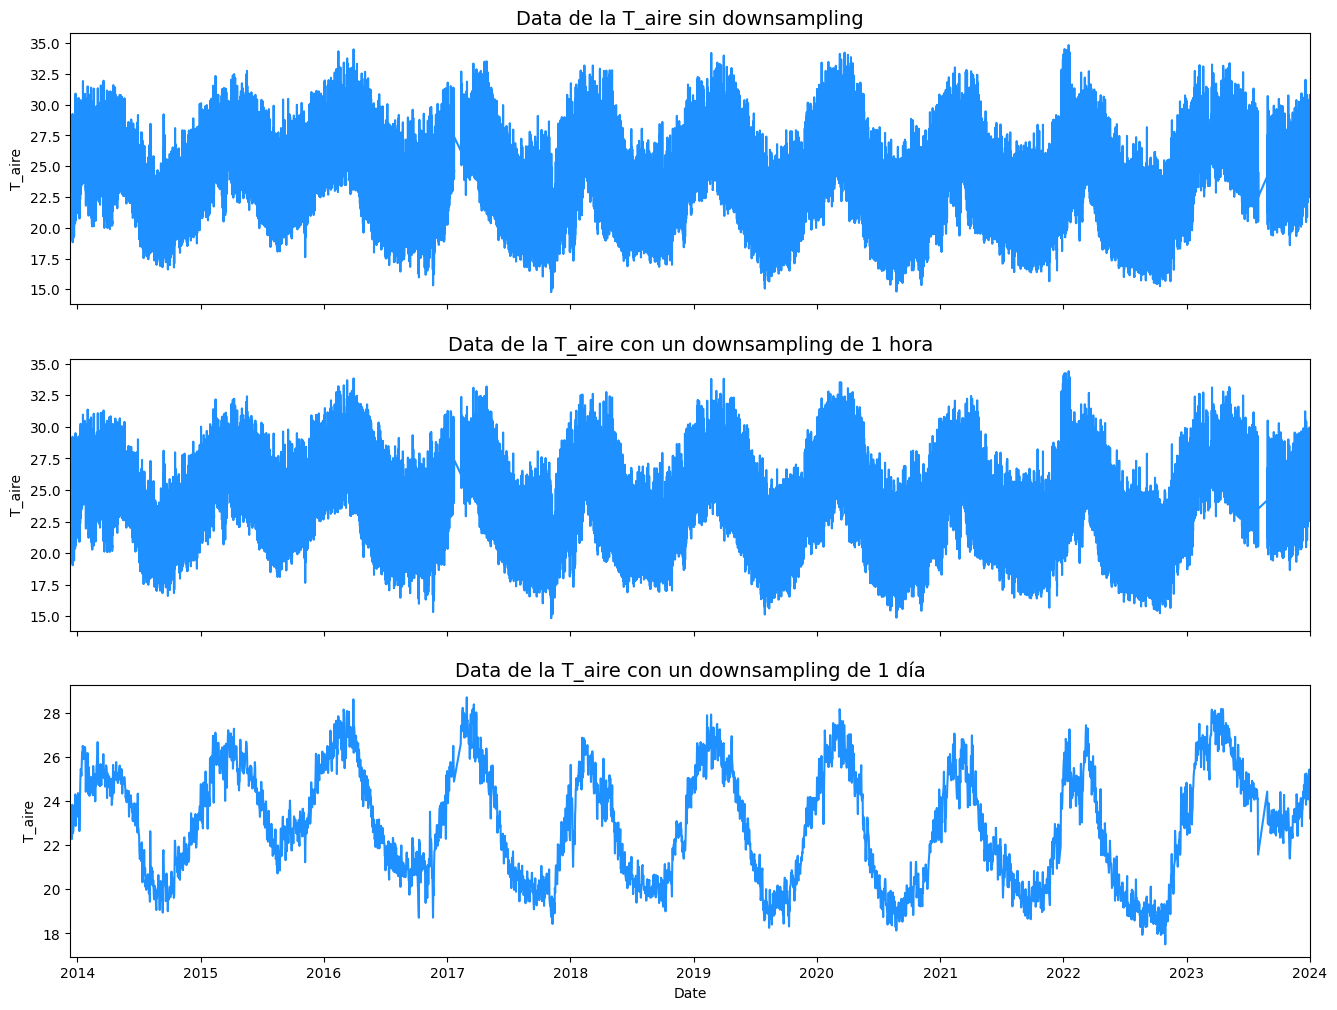

In [13]:
#Determinamos la configuracion de la figura por plotear (este paso se repite)
fig, ax = plt.subplots(ncols=1, nrows=3, sharex=True, figsize=(16,12))

#/////Graficamos la curva original de la data['T_aire']//////
sns.lineplot(x=df['Date'], y=df['T_aire'],ax=ax[0],color='dodgerblue')
ax[0].set_title('Data de la T_aire sin downsampling', fontsize=14)

#Graficamos la curva de la data['T_agua'] con un downsampling de 1 hora
resampled_df = df[['Date','T_aire']].resample('H', on='Date').mean().reset_index(drop=False)
sns.lineplot(x=resampled_df['Date'], y=resampled_df['T_aire'], color='dodgerblue', ax=ax[1])
ax[1].set_title('Data de la T_aire con un downsampling de 1 hora', fontsize=14)

#Graficamos la curva de la data['T_agua'] con un downsampling de 1 día
resampled_df = df[['Date','T_aire']].resample('D', on='Date').mean().reset_index(drop=False)
sns.lineplot(x=resampled_df['Date'], y=resampled_df['T_aire'], color='dodgerblue', ax=ax[2])
ax[2].set_title('Data de la T_aire con un downsampling de 1 día', fontsize=14)

for i in range(3):
    ax[i].set_xlim([datetime(2013, 12, 10, 16, 0, 0), datetime(2024, 1, 2, 8, 30, 0)])

plt.show()

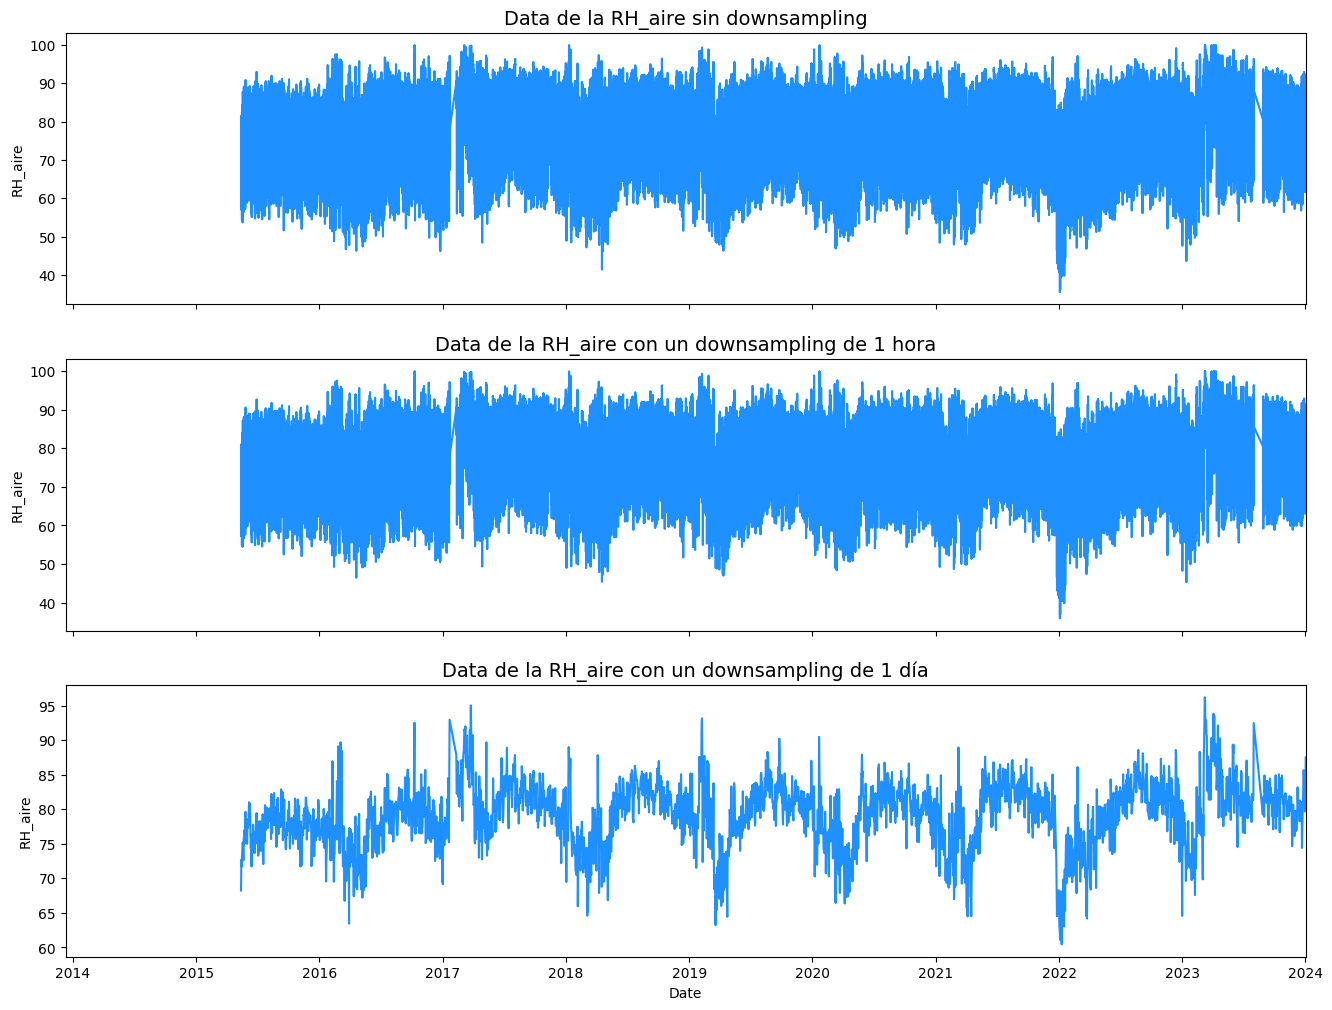

In [14]:
#Determinamos la configuracion de la figura por plotear (este paso se repite)
fig, ax = plt.subplots(ncols=1, nrows=3, sharex=True, figsize=(16,12))

#/////////Graficamos la curva original de la data['RH_aire']////////
sns.lineplot(x=df['Date'], y=df['RH_aire'],ax=ax[0],color='dodgerblue')
ax[0].set_title('Data de la RH_aire sin downsampling', fontsize=14)

#Graficamos la curva de la data['T_agua'] con un downsampling de 1 hora
resampled_df = df[['Date','RH_aire']].resample('H', on='Date').mean().reset_index(drop=False)
sns.lineplot(x=resampled_df['Date'], y=resampled_df['RH_aire'], color='dodgerblue', ax=ax[1])
ax[1].set_title('Data de la RH_aire con un downsampling de 1 hora', fontsize=14)

#Graficamos la curva de la data['T_agua'] con un downsampling de 1 día
resampled_df = df[['Date','RH_aire']].resample('D', on='Date').mean().reset_index(drop=False)
sns.lineplot(x=resampled_df['Date'], y=resampled_df['RH_aire'], color='dodgerblue', ax=ax[2])
ax[2].set_title('Data de la RH_aire con un downsampling de 1 día', fontsize=14)

for i in range(3):
    ax[i].set_xlim([datetime(2013, 12, 10, 16, 0, 0), datetime(2024, 1, 2, 8, 30, 0)])
    
plt.show()  

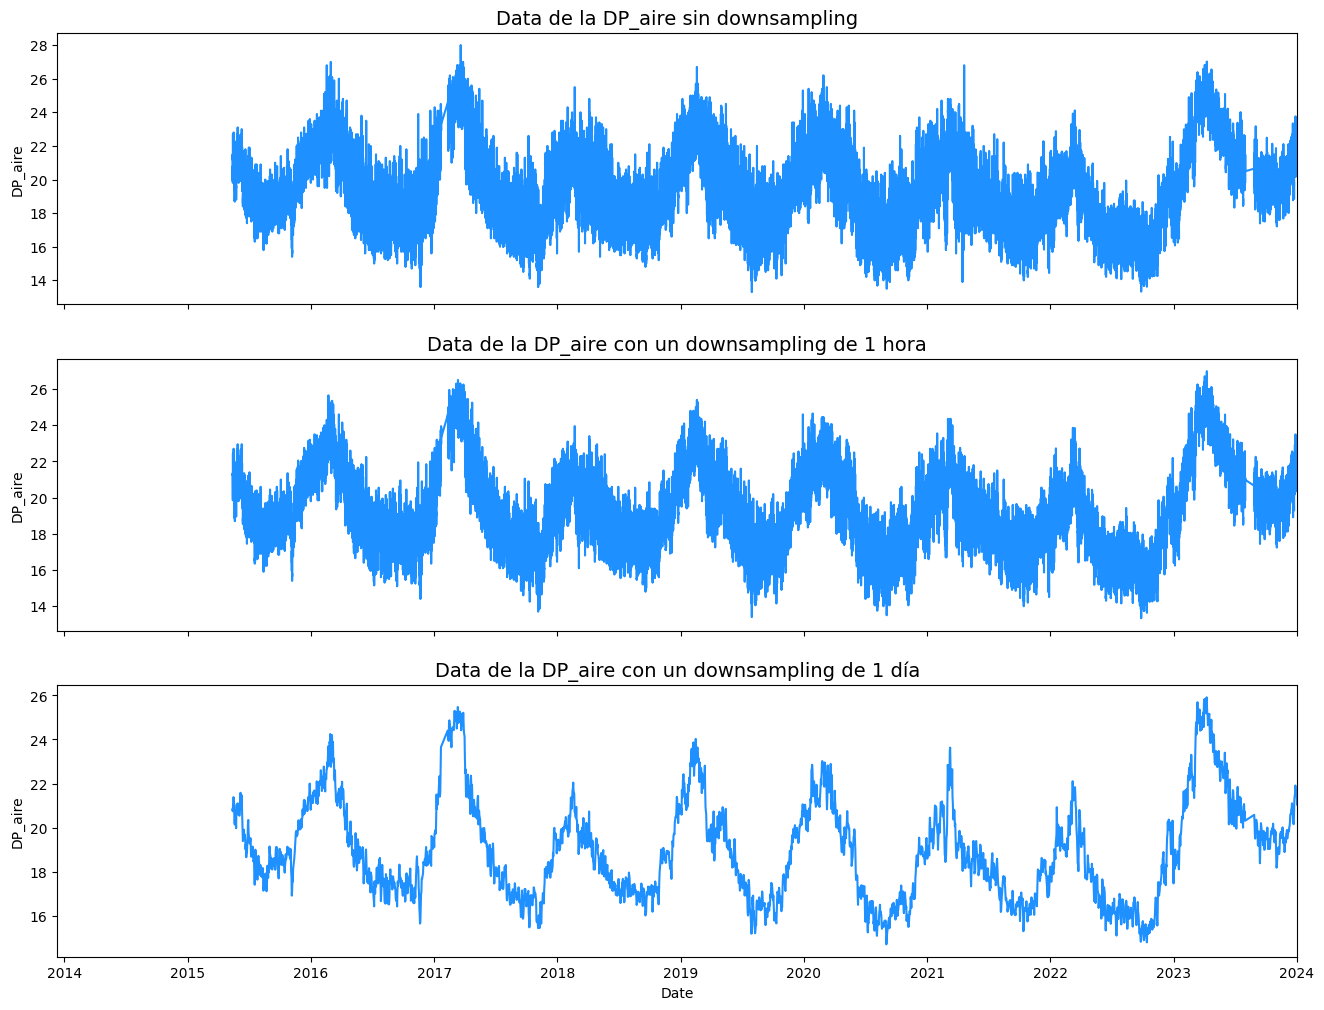

In [15]:
#Determinamos la configuracion de la figura por plotear (este paso se repite)
fig, ax = plt.subplots(ncols=1, nrows=3, sharex=True, figsize=(16,12))

#/////////Graficamos la curva original de la data['DP_aire']////////
sns.lineplot(x=df['Date'], y=df['DP_aire'],ax=ax[0],color='dodgerblue')
ax[0].set_title('Data de la DP_aire sin downsampling', fontsize=14)

#Graficamos la curva de la data['T_agua'] con un downsampling de 1 hora
resampled_df = df[['Date','DP_aire']].resample('H', on='Date').mean().reset_index(drop=False)
sns.lineplot(x=resampled_df['Date'], y=resampled_df['DP_aire'], color='dodgerblue', ax=ax[1])
ax[1].set_title('Data de la DP_aire con un downsampling de 1 hora', fontsize=14)

#Graficamos la curva de la data['T_agua'] con un downsampling de 1 día
resampled_df = df[['Date','DP_aire']].resample('D', on='Date').mean().reset_index(drop=False)
sns.lineplot(x=resampled_df['Date'], y=resampled_df['DP_aire'], color='dodgerblue', ax=ax[2])
ax[2].set_title('Data de la DP_aire con un downsampling de 1 día', fontsize=14)

for i in range(3):
    ax[i].set_xlim([datetime(2013, 12, 10, 16, 0, 0), datetime(2024, 1, 2, 8, 30, 0)])

plt.show()

In [16]:
#Como ahora sabemos que hacer un downsampling, suaviza las curvas, podemos ir probando modelos bases con esta nueva data
#Usamos la funcion downsample, con un downsampling de 1h (H)
downsample = df[['Date',
                 'T_agua',
                 'T_aire',
                 'RH_aire',
                 'DP_aire',
                ]].resample('D', on='Date').mean().reset_index(drop=False)

df = downsample.copy()

In [66]:
# Breve explicacion de la funcion rolling:
#rolling() se usa para hacer calculos tomando en cuenta los valores previos al punto de analisis
#rolling.mean() calcula la media movil, ej:
    #import pandas as pd

    ## Crear una Serie de datos
    #data = [1, 2, 3, 4, 5]

    ## Crear un DataFrame con la Serie
    #df = pd.DataFrame({'Value': data})

    ## Calcular la media móvil con ventana de 3
    #rolling_mean = df['Value'].rolling(window=3).mean()

    #print(rolling_mean)

    #Salida:

    #0    NaN
    #1    NaN
    #2    2.0
    #3    3.0
    #4    4.0

#rolling.std() calcula la desviacion estandar, ej:
    #import pandas as pd

    ## Crear una Serie de datos
    #data = [1, 2, 3, 10, 20]

    ## Crear un DataFrame con la Serie
    #df = pd.DataFrame({'Value': data})

    ## Calcular la desviación estándar móvil con ventana de 3
    #rolling_std = df['Value'].rolling(window=3).std()

    #print(rolling_std)

    #Salida:

    #0         NaN
    #1         NaN
    #2    0.816497
    #3    4.163332
    #4    9.082951

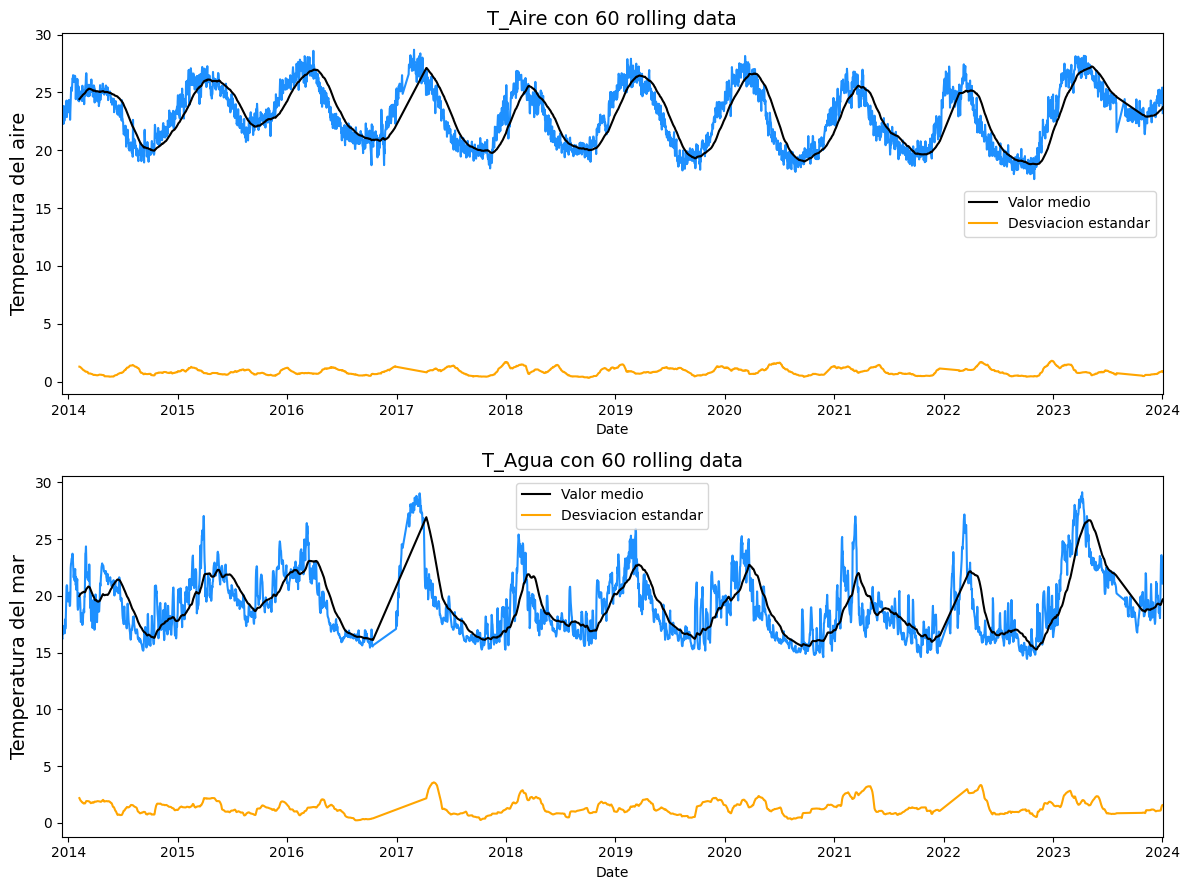

In [19]:
#Creamos la variable de cuantos datos atras usaremos para calcular lo requerido por la funcion rolling()
#Aun no determino cual es el valor optimo para observar correctamente la estacionalidad de una curva (pero es eso)
rolling_window =60
#Definimos los parametros de la figura a plotear
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 9))
#Graficamos la curva original de 'T_aire'
sns.lineplot(x=df['Date'], y=df['T_aire'], ax=ax[0], color='dodgerblue')
#Graficamos la curva de los puntos calculados con la funcion rolling.mean()
sns.lineplot(x=df['Date'], y=df['T_aire'].rolling(rolling_window).mean(), ax=ax[0], color='black', label='Valor medio')
#Graficamos la curva de los puntos calculados con la funcion rolling.std()
sns.lineplot(x=df['Date'], y=df['T_aire'].rolling(rolling_window).std(), ax=ax[0], color='orange', label='Desviacion estandar')
#Establecemos el titulo de la grafica de T_aire y las otras graficas previas
ax[0].set_title('T_Aire con 60 rolling data', fontsize=14)
#Establecemos el valor de los valores del eje Y de la grafica de T_aire y las otras graficas previas
ax[0].set_ylabel(ylabel='Temperatura del aire', fontsize=14)
#Establecemos el valor de los valores del eje X (un intervalo de tiempo) de la grafica de T_aire y las otras graficas previas
ax[0].set_xlim([datetime(2013, 12, 10, 16, 0, 0), datetime(2024, 1, 2, 8, 30, 0)])

#Graficamos la curva original de 'T_agua'
sns.lineplot(x=df['Date'], y=df['T_agua'], ax=ax[1], color='dodgerblue')
#Graficamos la curva de los puntos calculados con la funcion rolling.mean()
sns.lineplot(x=df['Date'], y=df['T_agua'].rolling(rolling_window).mean(), ax=ax[1], color='black', label='Valor medio')
#Graficamos la curva de los puntos calculados con la funcion rolling.std()
sns.lineplot(x=df['Date'], y=df['T_agua'].rolling(rolling_window).std(), ax=ax[1], color='orange', label='Desviacion estandar')
#Establecemos el titulo de la grafica de T_agua y las otras graficas previas
ax[1].set_title('T_Agua con 60 rolling data', fontsize=14)
#Establecemos el valor de los valores del eje Y de la grafica de T_agua y las otras graficas previas
ax[1].set_ylabel(ylabel='Temperatura del mar', fontsize=14)
#Establecemos el valor de los valores del eje X (un intervalo de tiempo) de la grafica de T_agua y las otras graficas previas
ax[1].set_xlim([datetime(2013, 12, 10, 16, 0, 0), datetime(2024, 1, 2, 8, 30, 0)])

plt.tight_layout()
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller
#Aplica la prueba de Dickey-Fuller a la serie temporal contenida en la columna 'T_agua' del DataFrame
    #Antes que nada, expliquemos que es una prueba Dickey-Fuller:
    #Para todo tipo de analisis de este tipo(estadistico), se parte de 2 suposiciones o hipotesis iniciales, en este caso son:
        #Null hypothesis: No existe un valor estacionario en los valores de T_agua
        #Alternative Hypothesis: Existe un valor estacionario en los valores de T_agua
result = adfuller(df['T_agua'].values)
result
#La correcta interpretacion de estos valores son los siguientes:
    #-0.82885: valor critico de la data (es un valor calculado que aun no entiendo para que se usa xd)
    #0.81049:probabilidad de que la Null Hypothesis sea cierta (en este caso es alta (>0.05) por lo que T_agua no es estacionaria)
    #20: numero de intervalos usados para la prueba de Dickey-Fuller
    #819: cantidad de datos usados de la serie para la prueba de Dickey-Fuller
    #{'1%': -3.438,'5%': -2.8654,10%': -2.5686}: valores T (valores de desviacion estandar de la data usada para la prueba)
    #-131.258: valor de informacion maximizado (valor que se calcula automaticante para luego calcular el # de intervalos que se usara)
#RESUMEN: EL VALOR IMPORTANTE ES EL 2DO(el P-valor) (SI ES MAYOR A 0.05 SE PUEDE ASUMIR QUE LA SERIE NO ES ESTACIONARIA)

MissingDataError: exog contains inf or nans

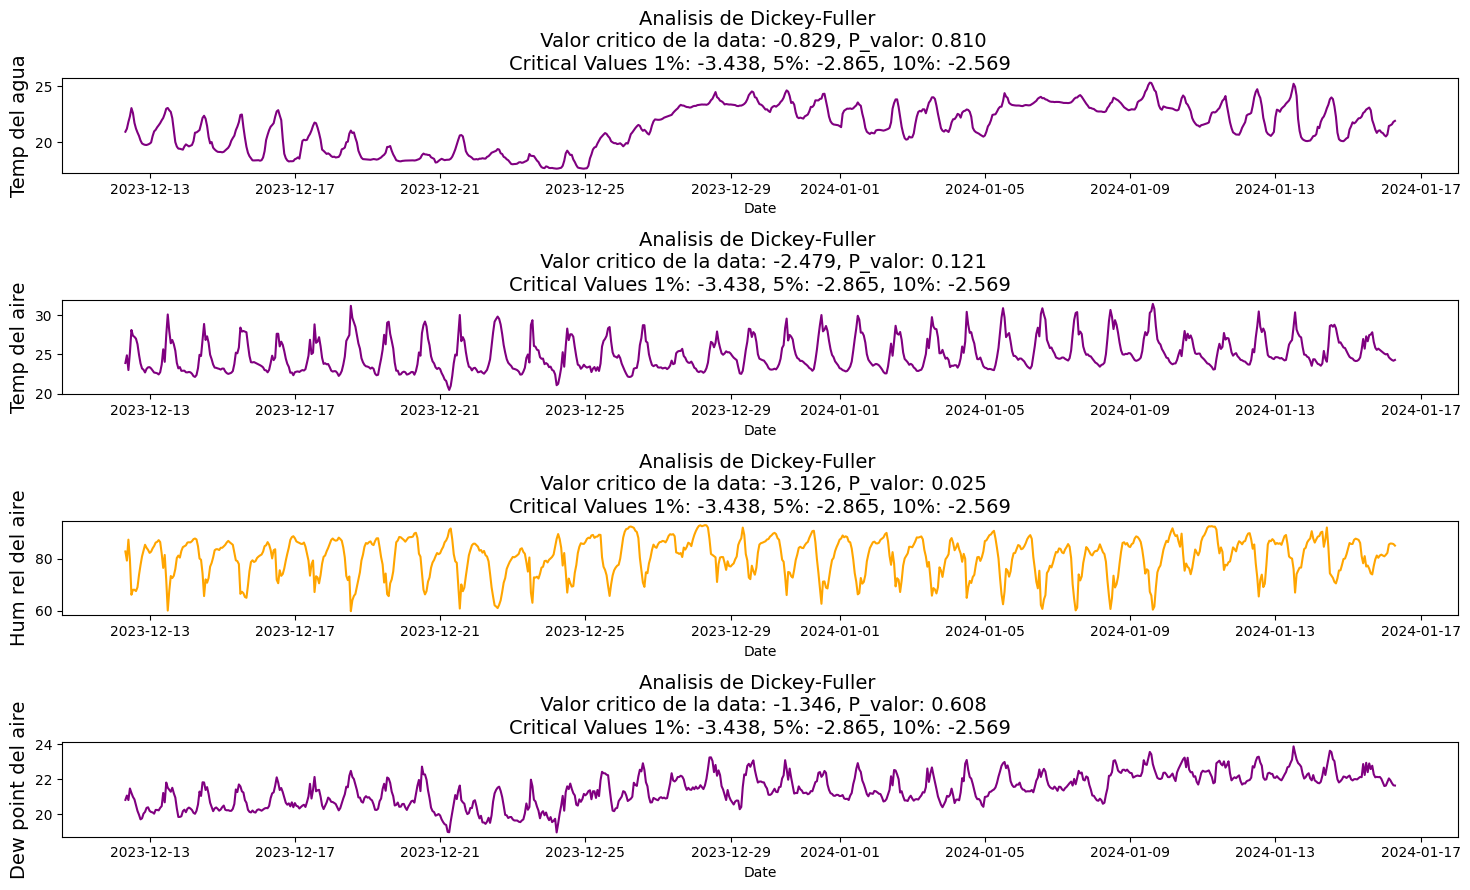

In [69]:
#Definimos la configuracion de la figura (que contiene varias graficas) que plotearemos
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 9))
#Creamos una funcion para visualizar los resultados de las pruebas Dickey-Fuller (Adfuller())
#A dicha funcion le ingresaremos los valores: serie(datos de T_agua/T_aire,etc.), titulo(de la grafica), rango de tiempo (ax)
def ver_adfuller(series, title, ax):
    #Aca guardamos los resultados antes detallados en una variable llamada result
    result = adfuller(series)
    #Definimos el valor minimo de significancia (referente al minimo valor que un P-valor debe tener para hacer una serie no estacionaria)
    significance_level = 0.05
    #Extraemos el primer dato de la variable result y se la copiamos a otra variable (adf_stat)
    adf_stat = result[0]
    #Extraemos el segundo dato de la variable result y se la copiamos a otra variable (p_val)
    p_val = result[1]
    #Extraemos multiples valores del dato 4 de la variable result(que esta dentro de llaves) por las etiquetas (1,5,10)
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']
#Establecemos todas las posibilidades de la prueba de Dickey-Fuller:
    #Si el p-valor < 0.05 y el valor critico total de la data es menor que el valor critico del 1% de la data examinada, linea verde
    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen'
    #Si el p-valor < 0.05 y el valor critico total de la data es menor que el valor critico del 5% de la data examinada, linea naranja
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    #Si el p-valor < 0.05 y el valor critico total de la data es menor que el valor critico del 10% de la data examinada, linea roja
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    #Si el p-valor >0.05 , linea morada
    else:
        linecolor = 'purple'
#Saliendo de los ifs, se procede a colorear con el dato de la serie (valores 'Date' y 'T_agua/T_Aire,etc.'), rango de tiempo (ax) y linecolor(determinado en los bucles if)
    sns.lineplot(x=df['Date'], y=series, ax=ax, color=linecolor)
    #Nombro los titulos de ambos ejes: en el eje x tengo:'valor critico de la data de ADF(analisis de Fuller), p-valor:{p-val}, Critical values 1%:{crit_val_1}, etc.....'
    ax.set_title(f'Analisis de Dickey-Fuller \n Valor critico de la data: {adf_stat:0.3f}, P_valor: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)
#Ingresamos las series a las que realizaremos la prueba de Dickey-Fuller
ver_adfuller(df['T_agua'].values, 'Temp del agua', ax[0])
ver_adfuller(df['T_aire'].values, 'Temp del aire', ax[1])
ver_adfuller(df['RH_aire'].values, 'Hum rel del aire', ax[2])
ver_adfuller(df['DP_aire'].values, 'Dew point del aire', ax[3])

plt.tight_layout()
plt.show()

#RESUMEN: solo la humedad del aire tiene un valor estacionario, que se ubicaria aprox en: 78%

In [70]:
#Si la serie temporal es no estacionaria, pero a pesar de eso queremos usar un modelo 
#ARIMA(que necesita que la data input lo sea), podemos transformarla.

#Las formas mas comunes de hacerlo son:
    #Por Transformacion: aplicamos ln() a todos los datos de la serie temporal
    #Por Diferenciacion: Restamos los valores actuales con los valores previos

C:\Users\carlo\AppData\Local\Temp\ipykernel_17092\3108401870.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['T_agua_log'], ax=ax[1])


<Axes: xlabel='T_agua_log', ylabel='Density'>

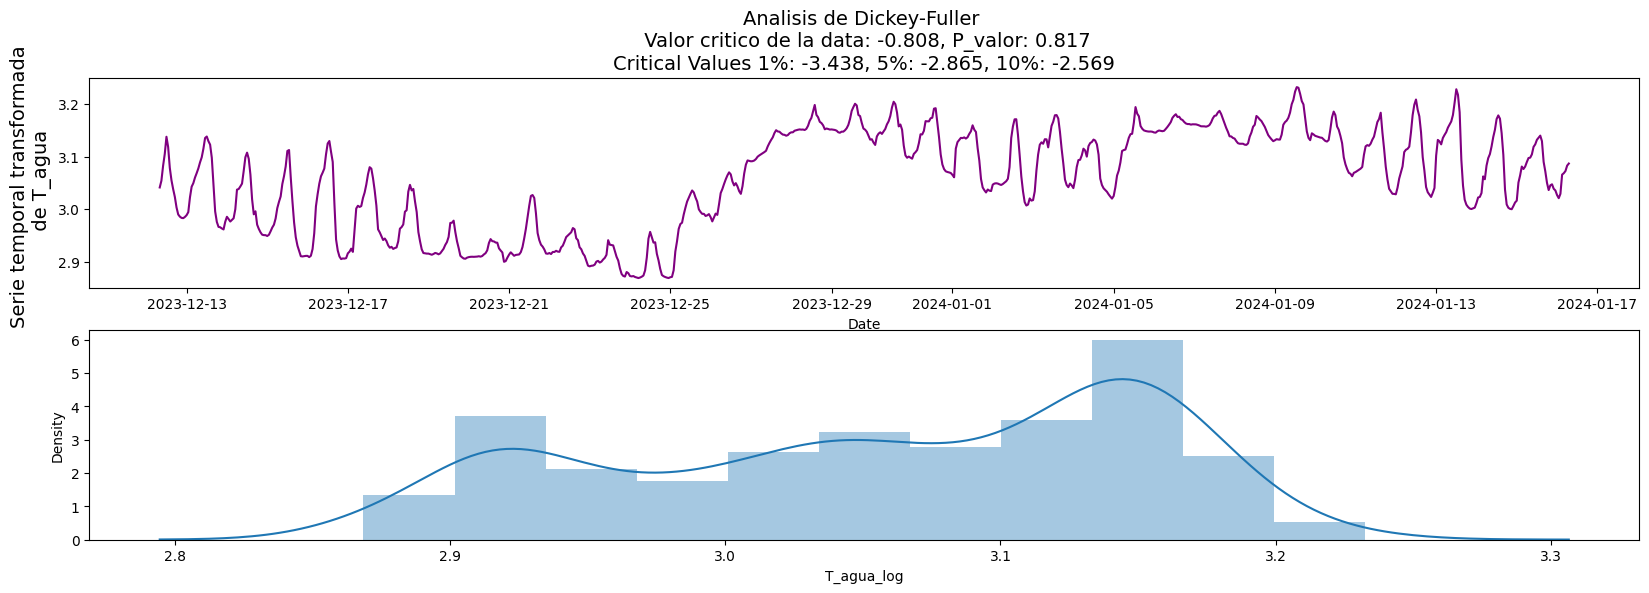

In [71]:
#Por Transformacion
import numpy as np
#Agregamos una nueva columna al data frame (df) donde guardamos los valores transformados de los datos correspondientes, el abs es por si hubieran valores negativos
df['T_agua_log'] = np.log(abs(df['T_agua']))
#Definimos los parametros de la figura a plotear
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 6))
#Para la primera grafica, aplicamos el analisis de Dickey-Fuller a la nueva columna del data frame
ver_adfuller(df['T_agua_log'], 'Serie temporal transformada \n de T_agua', ax[0])
#Para la 2da garfica, vamos a graficar el histograma de los valores de la serie temporal transformada
sns.distplot(df['T_agua_log'], ax=ax[1])

#RESUMEN: no funciono xd

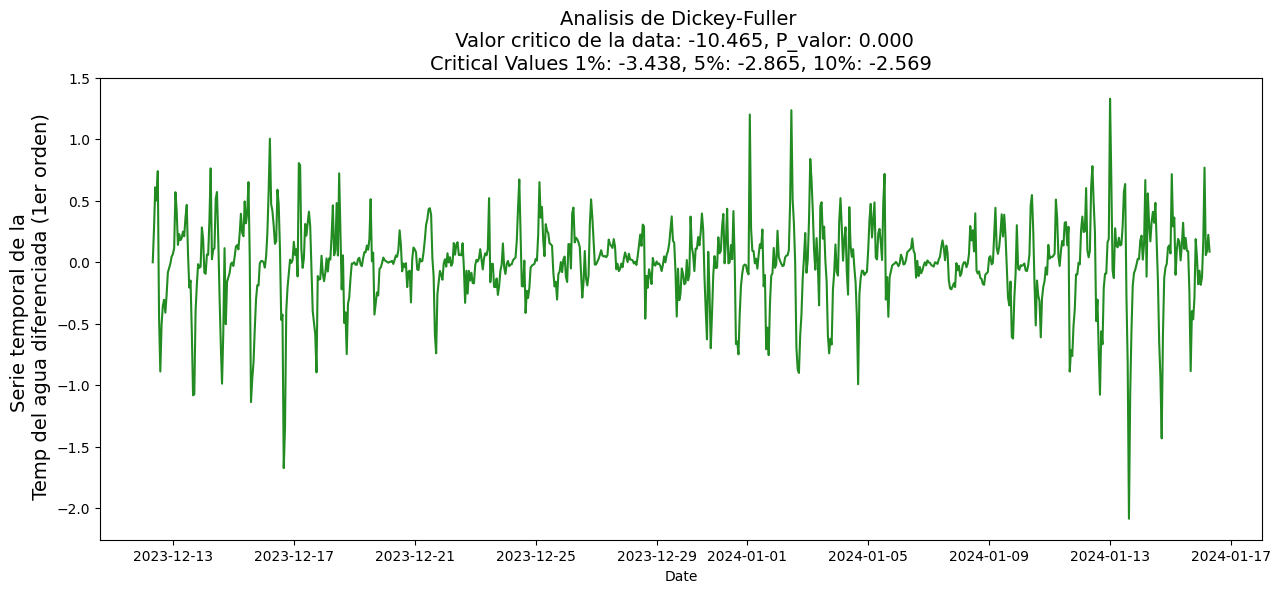

In [72]:
#Por Diferenciacion
#Aplicamos el concepto de diferenciacion(basicamente restamos el valor p con el valor p-1)
ts_diff = np.diff(df['T_agua'])
#Lo agregamos al dataframe(creamos una nueva columna dentro del dataframe)
df['T_agua_diff_1'] = np.append([0], ts_diff)
#Configuramos la figura a plotear
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
#Usamos la funcion ver_adfuller
ver_adfuller(df['T_agua_diff_1'], 'Serie temporal de la \n Temp del agua diferenciada (1er orden)', ax)
#RESUMEN: funciono lol (esto debemos repetirlo para las demas series no estacionarias)

In [73]:
#Procedemos a crear mas columnas en el dataframe, en este caso, las etiquetas de datetime correspondiente a cada dato de T_agua
df['year'] = pd.DatetimeIndex(df['Date']).year#Año del dato de T_agua
df['month'] = pd.DatetimeIndex(df['Date']).month#Mes(0-12) del dato de T_agua
df['day'] = pd.DatetimeIndex(df['Date']).day#Día(0-31) del dato de T_agua
df['hour'] = pd.DatetimeIndex(df['Date']).hour#Hora(0-24) del dato de T_agua
df['day_of_year'] = pd.DatetimeIndex(df['Date']).dayofyear#Día del año(1-365) del dato de T_agua
df['quarter'] = pd.DatetimeIndex(df['Date']).quarter#Cuarto del año(1-4) dato de T_agua
df['season'] = df['month'] % 12 // 3 + 1#Estacion del año(Verano-Invierno) del dato de T_agua

df[['Date', 'hour','year', 'month', 'day', 'day_of_year', 'quarter', 'season']].head()

,Date,hour,year,month,day,day_of_year,quarter,season
0,2023-12-12 08:00:00,8,2023,12,12,346,4,1
1,2023-12-12 09:00:00,9,2023,12,12,346,4,1
2,2023-12-12 10:00:00,10,2023,12,12,346,4,1
3,2023-12-12 11:00:00,11,2023,12,12,346,4,1
4,2023-12-12 12:00:00,12,2023,12,12,346,4,1


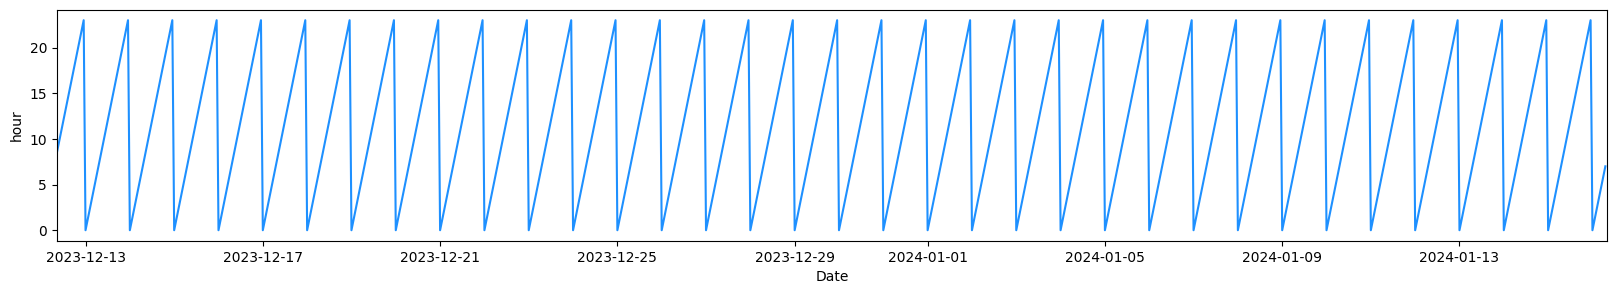

In [74]:
#Observamos que los datos de tiempo (ej: las horas o los dias en esta data) son ciclicos y que mas importante aun 
#existe un decenso abrupto luego del valor de 24, esto puede confundir varios modelos, por lo que tenemos que codificar
#Especificamos las caracteristicas de la figura a plotear
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))
#Dibujamos la grafica
sns.lineplot(x=df['Date'], y=df['hour'], color='dodgerblue')
#Le damos el intervalo de tiempo
ax.set_xlim([datetime(2023, 12, 12, 8, 30, 0), datetime(2024, 1, 16, 7, 50, 0)])
#imprimimos
plt.show()

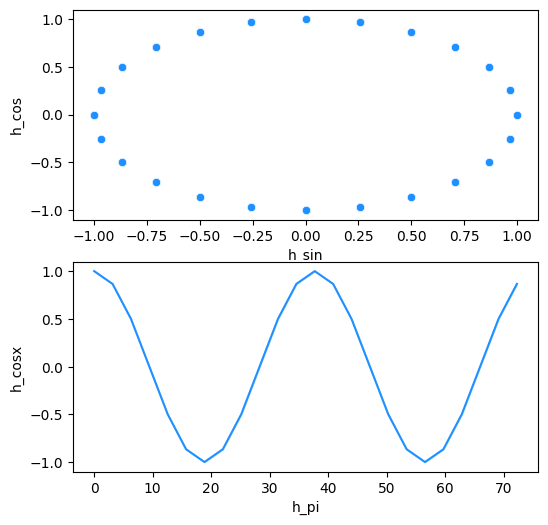

In [75]:
#Para codificar usaremos las propiedades trigonometricas de sen y cos:
#Numero de valor maximo del ciclo
hours_day=24
df['h_sin'] = np.sin(2*np.pi*df['hour']/hours_day)
df['h_cos'] = np.cos(2*np.pi*df['hour']/hours_day)
#Especificamos las caracteristicas de la figura a plotear
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(6, 6))
#Graficamos la curva 1
sns.scatterplot(x=df.h_sin, y=df.h_cos, color='dodgerblue', ax=ax[0])
#Graficamos la curva 2
df['h_pi'] = np.pi*df['hour']
df['h_cosx'] = np.cos(4*np.pi*df['hour']/hours_day)
sns.lineplot(x=df.h_pi, y=df.h_cosx, color='dodgerblue', ax=ax[1])
#Imprimimos la figura
plt.show()

In [76]:
#Breve explicacion de la descomposicion de series de tiempo:
#Toda serie de tiempo posee los siguientes parametros:
    #Level(Nivel): Valor promedio en toda la serie
    #Trend(Tendencia): Indicador de si el valor promedio sube o baja (puede no existir)
    #Seasonality(Repetividad): tendencia a repetir tendencias o valores cada cierto tiempo (puede no existir)
    #Noise(Ruido): valores random que no son parte de ninguna tendencia o datos ciclicos
#Todas las series pueden ser una combinacion de estos parametros y pueden ser de 2 tipos:
    #Aditivo: y(t)=Level+Trend+Seasonality+Noise
    #Multiplicativo: y(t)=Level*Trend*Seasonality*Noise

In [20]:
#Importamos la funcion seasonal_decomposed()
from statsmodels.tsa.seasonal import seasonal_decompose
#Definimos una variable core_columns donde guardaremos todos los nombres de las etiquetas de datos que analizaremos
core_columns =  ['T_agua','T_aire', 'RH_aire','DP_aire']
#Generamos un bucle for para aplicar decomp() a cada etiqueta de core_columns
for column in core_columns:
    #La funcion seasonal_decompose genera 2 datos: trend y seasonality
    decomp = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')
    df[f"{column}_trend"] = decomp.trend
    df[f"{column}_seasonal"] = decomp.seasonal

ValueError: This function does not handle missing values

NameError: name 'seasonal_decompose' is not defined

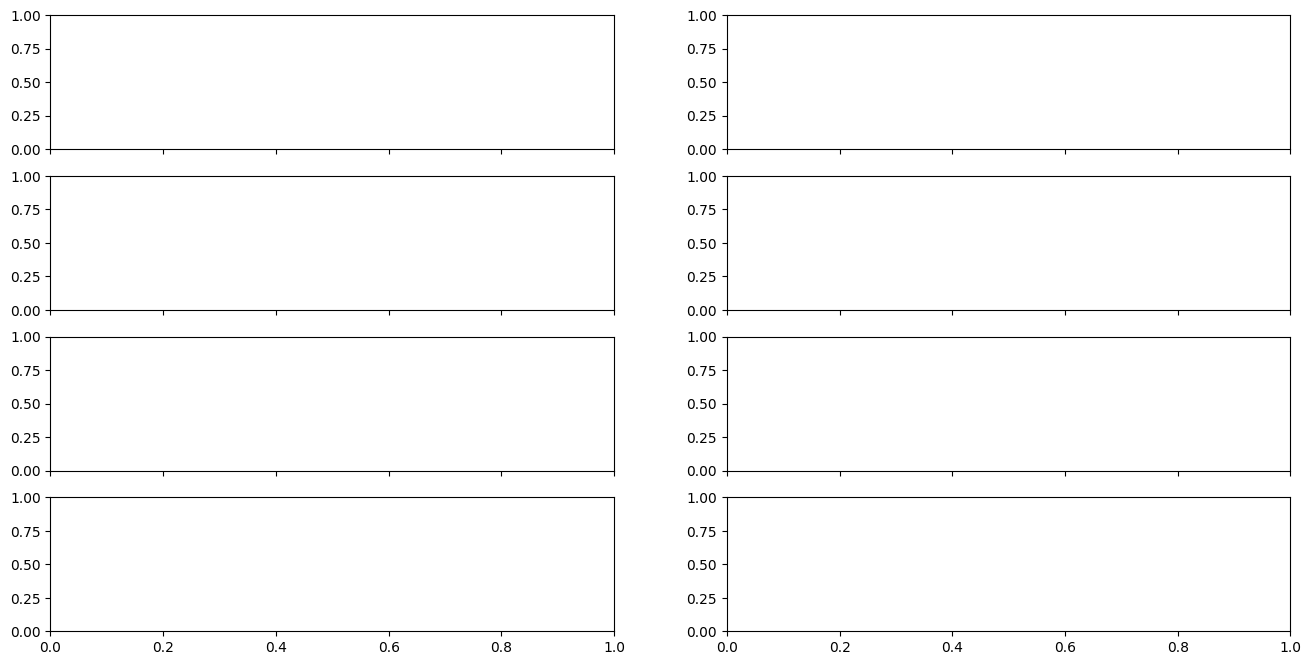

In [19]:
#Configuramos la forma de plotear de la figura
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))
#Generamos un bucle for para ingresar los datos de ambas etiquetas (el bucle se repetira 1 vez) (Se repeti el codigo para las 2 etiquetas faltantes)
for i, column in enumerate(['T_agua', 'T_aire']):
    #Definimos la variable res como el resultado de aplicar la funcion seasonal_decompose a cada etiqueta que ingresa por el bucle for
    res = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')
    #Damos el titulo, el cual se extrae de la etiqueta que ingresa del bucle for (format), tambien se define el tamaño (fontsize)
    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    #Graficamos la curva del Level (que aca le llama level), le colocamos nombre, y demas caracteristicas
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Level', fontsize=14)
    #Graficamos la curva del Trend, le colocamos nombre, y demas caracteristicas
    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)
    #Graficamos la curva del valor seasonal, le colocamos nombre, y demas caracteristicas
    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    #Graficamos la curva del Noise (que aca le llama resid), le colocamos nombre, y demas caracteristicas
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Noise', fontsize=14)

plt.show()

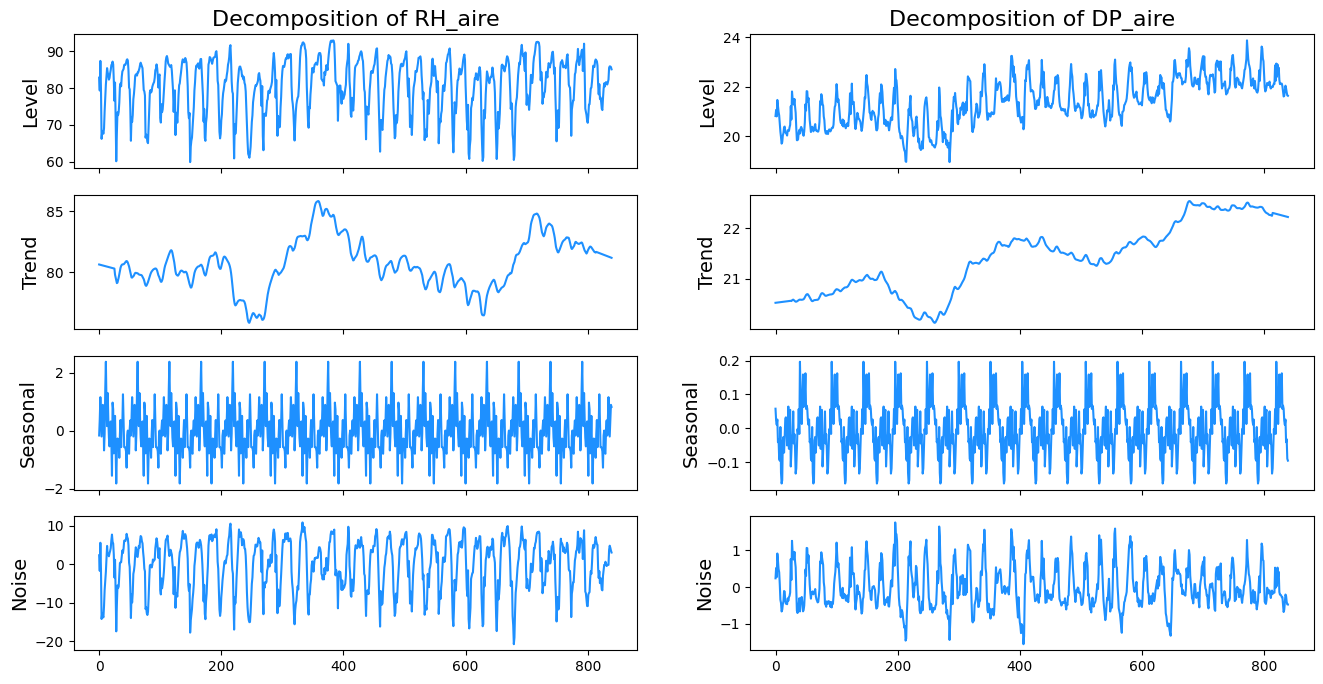

In [79]:
#Configuramos la forma de plotear de la figura
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))
#Bucle para las 2 etiquetas que faltaron en el codigo de arriba
for i, column in enumerate(['RH_aire', 'DP_aire']):

    res = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Level', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)

    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Noise', fontsize=14)

plt.show()

In [80]:
#Breve explicacion de la funcion shift():
#De la forma en la que la usaremos, solo es importante conocer que se usa para desplazar datos tal que:
    #.shift(period), si period es positivo se desplzaran los datos hacia abajo y si es positivo, al revez

In [81]:
hour_in_day=24 #Tambien puedes usar la variable antes definida hours_day
for column in core_columns:
    df[f'{column}_seasonal_shift_b_2m'] = df[f'{column}_seasonal'].shift(-2* hour_in_day)#se desplazan los datos 2 escalon arriba
    df[f'{column}_seasonal_shift_b_1m'] = df[f'{column}_seasonal'].shift(-1* hour_in_day)#se desplazan los datos 1 escalon arriba
    df[f'{column}_seasonal_shift_1m'] = df[f'{column}_seasonal'].shift(1* hour_in_day) #se desplazan los datos 1 escalon abajo
    df[f'{column}_seasonal_shift_2m'] = df[f'{column}_seasonal'].shift(2 * hour_in_day) #se desplazan los datos 2 escalones abajo
    df[f'{column}_seasonal_shift_3m'] = df[f'{column}_seasonal'].shift(3 * hour_in_day) #se desplazan los datos 3 escalones abajo

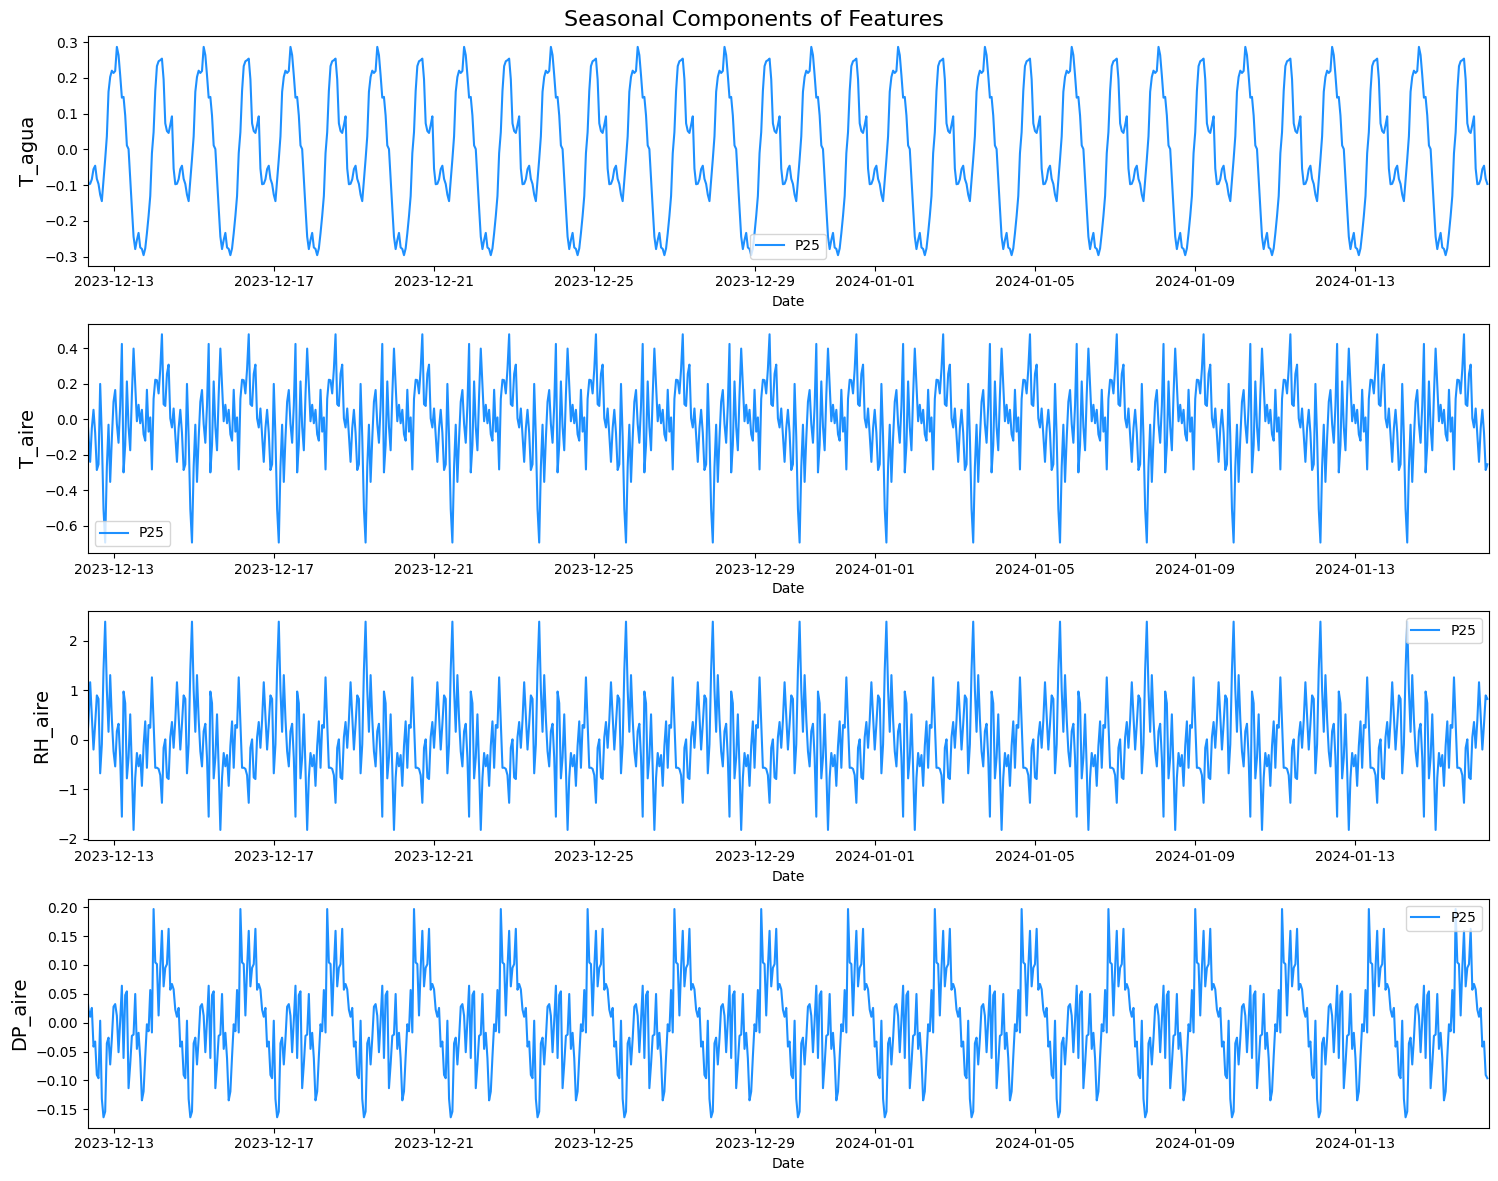

In [82]:
#Establecemos la configuracion de ploteo
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)
#Aca graficamos las lineas que guardamos en el dataframe hace 2 codigos
for i, column in enumerate(core_columns):
    sns.lineplot(x=df['Date'], y=df[column + '_seasonal'], ax=ax[i], color='dodgerblue', label='P25')
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    ax[i].set_xlim([datetime(2023, 12, 12, 8, 30, 0), datetime(2024, 1, 16, 7, 50, 0)])

plt.tight_layout()
plt.show()

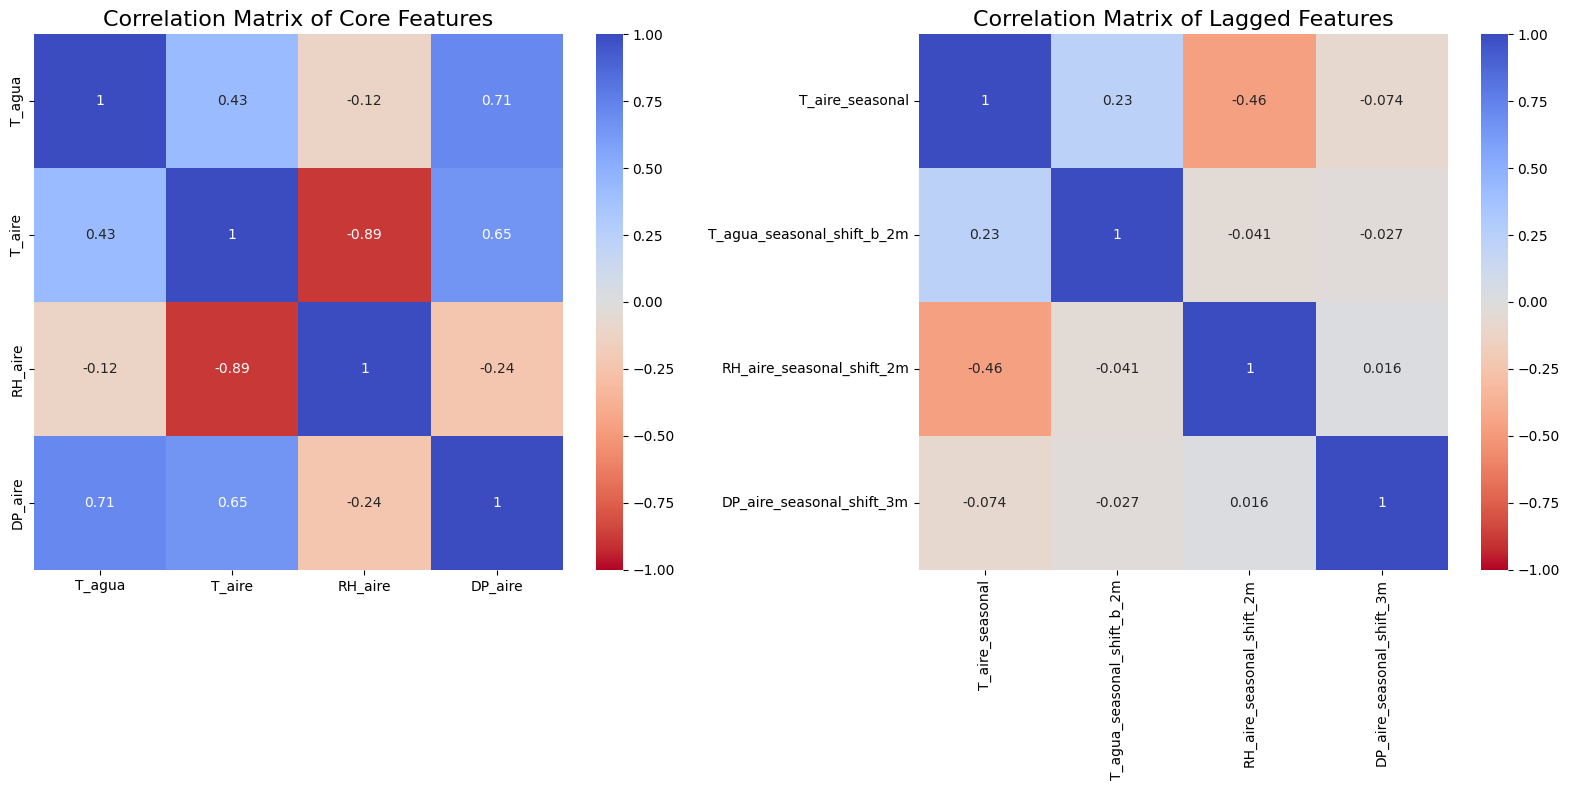

In [83]:
#Damos formato de ploteo
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
#La función corr() en pandas se utiliza para calcular la correlación entre columnas en un DataFrame
#La correlación es una medida estadística que describe la relación entre dos variables.
corrmat = df[core_columns].corr()
#Definimos la configuracion de la matriz de correlacion para los datos normales [T_agua, T_aire, etc.]
sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])
ax[0].set_title('Correlation Matrix of Core Features', fontsize=16)
#Definimos las variables sobre las cuales analizaremos la correlacion
shifted_cols = ['T_aire_seasonal','T_agua_seasonal_shift_b_2m','RH_aire_seasonal_shift_2m','DP_aire_seasonal_shift_3m']
#Graficamos la matriz de confusion para shifted_Cols
corrmat = df[shifted_cols].corr()
sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])
ax[1].set_title('Correlation Matrix of Lagged Features', fontsize=16)


plt.tight_layout()
plt.show()
#RESUMEN: con este codigo creamos una matriz de correlacion entre variables

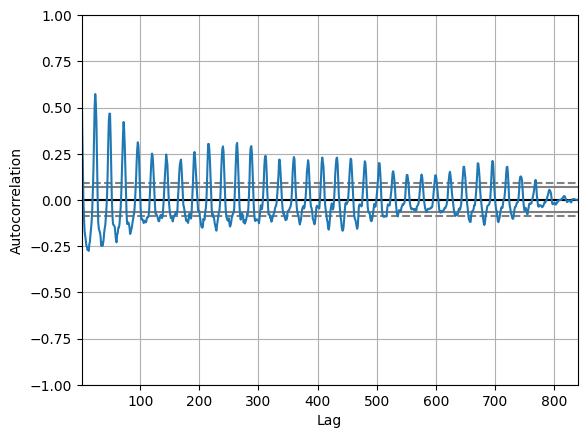

In [84]:
from pandas.plotting import autocorrelation_plot
#Aca imprimimos las curvas de autocorrelacion
autocorrelation_plot(df['T_agua_diff_1'])
plt.show()

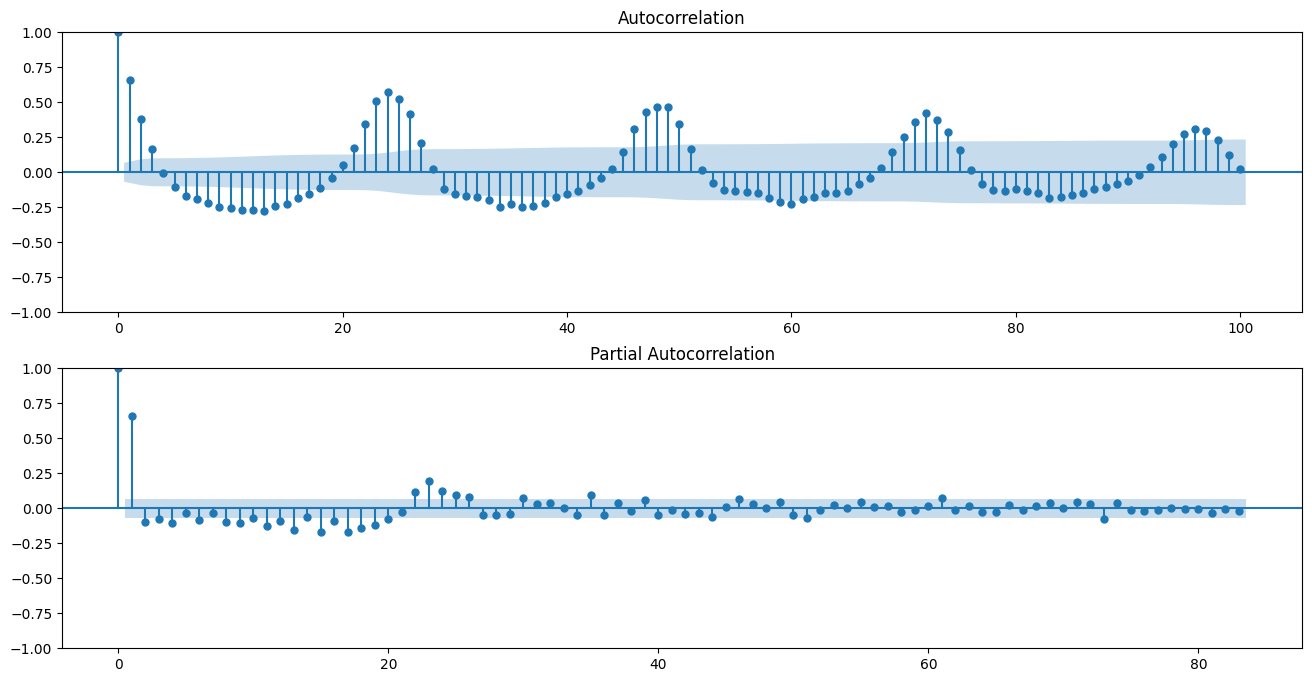

In [85]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#Definimos la figura
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))
#Ploteamos la grafica de autocorrelacion y de  parcial autocorrelacion
plot_acf(df['T_agua_diff_1'], lags=100, ax=ax[0])
plot_pacf(df['T_agua_diff_1'], lags=83, ax=ax[1])

plt.show()

In [21]:
#Importamos la funcion TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit
#Definimos el numero de splits que le haremos a la data
N_SPLITS = 3
#Definimos el eje X y Y
X = df['Date']
y = df['T_agua']
#Guardamos los archivos devueltos por la funcion split(series de tiempo separados)
folds = TimeSeriesSplit(n_splits=N_SPLITS)

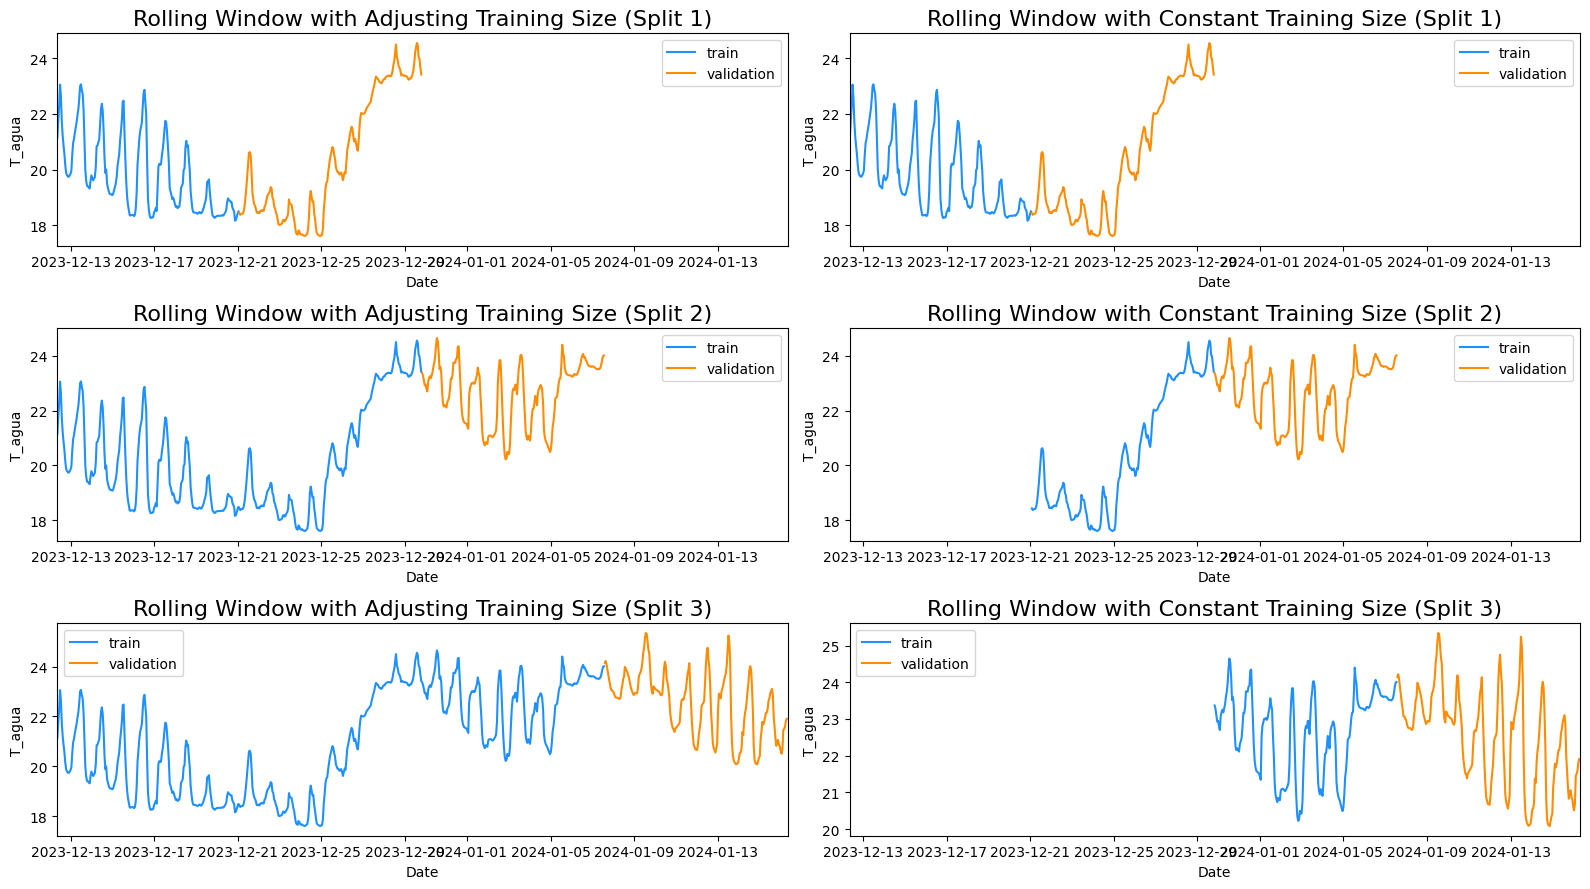

In [87]:
#Definimos la configuracion de la figura por plotear
f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))
#creamos  un bucle for en donde los splits se asignaran a valores X_train,Y_train,etc. segun el split que toque
for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]
    #imprimo la grafica de la columna 1 fila i (train)
    sns.lineplot(
        x=X_train,
        y=y_train,
        ax=ax[i,0],
        color='dodgerblue',
        label='train'
    )
    #imprimo la grafica de la columna 2 fila i (train)
    sns.lineplot(
        x=X_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))],
        y=y_train[len(X_train) - len(X_valid):(len(X_train) - len(X_valid) + len(X_valid))],
        ax=ax[i,1],
        color='dodgerblue',
        label='train'
    )
    #abre un bucle for para los valores de j: 0, 1
    for j in range(2):
        #Graficamos las curvas de validation con cada valor de los folder extraidos de TimeSeriesSplit
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    #Por cada valor i se dara un titulo de grafica para cada columna
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)
#le doy los rangos para cada valor de i
for i in range(N_SPLITS):
    ax[i, 0].set_xlim([datetime(2023, 12, 12, 8, 30, 0), datetime(2024, 1, 16, 7, 50, 0)])
    ax[i, 1].set_xlim([datetime(2023, 12, 12, 8, 30, 0), datetime(2024, 1, 16, 7, 50, 0)])

plt.tight_layout()
plt.show()

Probamos Prophet

In [22]:
#Definimos las proporciones de los paquete de train y test para ingresar a los modelos de prediccion
train_size = int(0.85 * len(df))
test_size = len(df) - train_size
#se crea una copia del dataframe original(df), pero solo de las columnas 'T_agua' y 'Date' a un dataframe nuevo (univariate_df)
univariate_df = df[['Date', 'T_agua']].copy()
#se le renombra a estas columnas como 'ds' y 'y'
univariate_df.columns = ['ds', 'y']
#asigna los valores del nuevo data frame de univariate_df a train, pero solo el % correspondiente a train_size (esto sirve solo como ej)
train = univariate_df.iloc[:train_size, :]
#Ahora si lo importante, dividimos la data frame copiada en sus valores correspondientes 0.7 para train y 0.3 para val, cada uno segun la columna q le toca (x:ds, y:y)
x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

74964 13229


In [24]:
#importamos Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from colorama import Fore
from prophet import Prophet


# Entrenamos el modelo
model = Prophet()
model.fit(train)

#aun no se para que es esto, ando en ello
#x_valid = model.make_future_dataframe(periods=test_size, freq='w')

#Predecimos y lo guardamos en la variable y_pred
y_pred = model.predict(x_valid)

#Calculamos metricas
score_mae = mean_absolute_error(y_valid, y_pred.tail(test_size)['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred.tail(test_size)['yhat']))
#Imprimimos las metricas calculadas
print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

18:43:32 - cmdstanpy - INFO - Chain [1] start processing
18:44:37 - cmdstanpy - INFO - Chain [1] done processing


ValueError: Input contains NaN.

NameError: name 'score_mae' is not defined

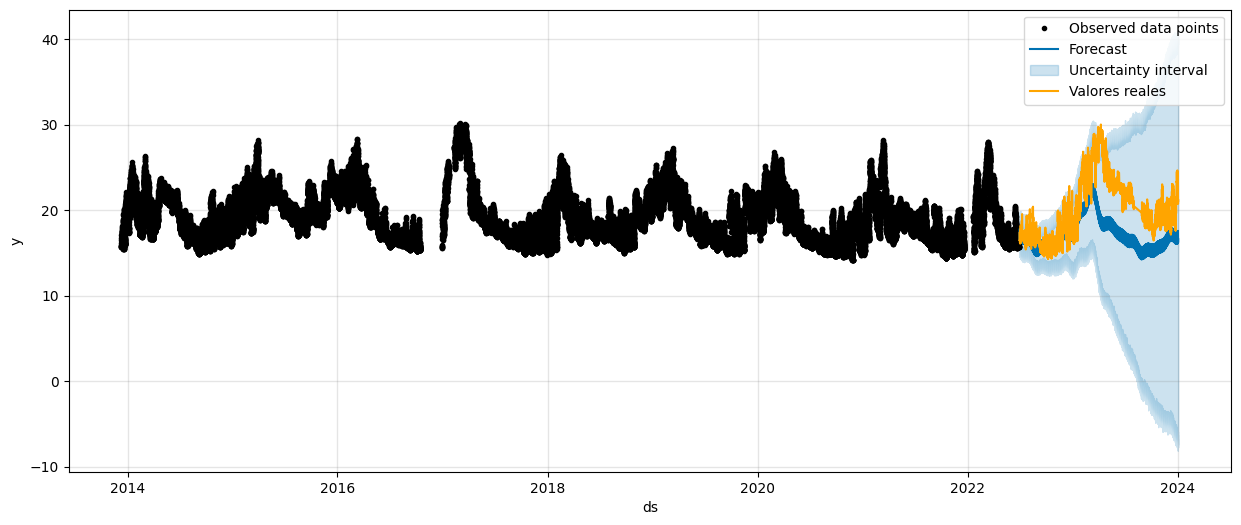

In [25]:
# Ploteamos la prediccion
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)
#usamos la funcion model.plot() para plotear la curva predictiva
model.plot(y_pred, ax=ax)
#graficamos la curva x_valid y y_valid (la curva real de la parte de la data que se usaron para obtener y_pred con x_test)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Valores reales') #navajowhite
#le damos el titulo y tambien imprimimos las metricas
ax.set_title(f'Prediccion con Prophet \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
#le asignamos los titulos a los ejes
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='T_agua', fontsize=14)

plt.show()

Probamos ARIMA

In [91]:
#importamos el modelo predictivo
from statsmodels.tsa.arima.model import ARIMA

#Entrenamos el modelo
model = ARIMA(y_train, order=(1,1,1))
model_fit = model.fit()

#Obtenemos los 3 valores siguientes con ARIMA
y_pred, se, conf = model_fit.forecast(3)
y_pred

#Hay un error en este codigo, score_mae y score_rmse se calculan por medio de una funcion que recibe arrays y en este caso le estamos dando solo 1 valor
#Calculamos las metricas
#score_mae = mean_absolute_error(y_valid, y_pred)
#score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

#print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

21.62990004154297

In [92]:
#ACA USARIAMOS UN CODIGO PARA PLOTEAR LA CURVA DE PREDICCION DE ARIMA, PERO EL MODELO ARIMA QUE ESTAMOS USANDO NO LO PERMITE
#f, ax = plt.subplots(1)
#f.set_figheight(6)
#f.set_figwidth(15)
#ploteamos la grafica de la prediccion realizada
#model_fit.plot_predict(1, 599, ax=ax)
#Imprimimos la curva de solo las predicciones de ARIMA y los valores reales
#sns.lineplot(x=x_valid.index, y=y_valid['y'], ax=ax, color='orange', label='Valores reales') #navajowhite
#Le damos titulo a la grafica
#ax.set_title(f'Prediccion con ARIMA \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
#ax.set_xlabel(xlabel='Date', fontsize=14)
#ax.set_ylabel(ylabel='T_agua', fontsize=14)

#ax.set_ylim(-35, -18)
#plt.show()

Ahora probamos Auto-ARIMA

In [93]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
#configuramos el modelo, aun estoy entendiendo que son esos valores
model = pm.auto_arima(y_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-9.808, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6399.029, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-98.105, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-97.283, Time=0.19 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-96.243, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-63.453, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.40 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-117.162, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-19.439, Time=0.22 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-115.047, Time=0.17 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-117.379, Time=0.54 sec

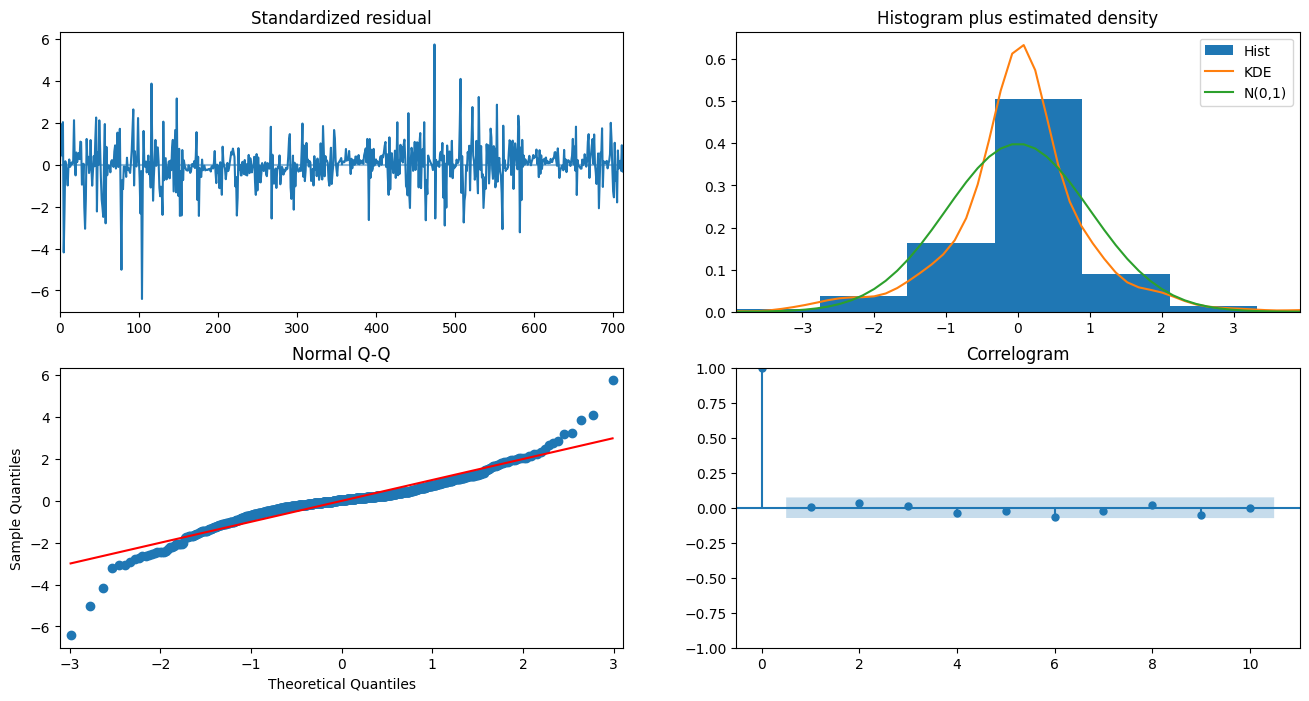

In [94]:
#Ploteamos el diagnostico del modelo, pq? para q entienda pa
model.plot_diagnostics(figsize=(16,8))
plt.show()

Finalmente probamos LSTM

In [26]:
from sklearn.preprocessing import MinMaxScaler
#Nombramos un dataframe data y le asignamos los valores del dataframe previo, pero solo la columna 'y' que corresponde a 'T_agua' del dataframe original
data = univariate_df.filter(['y'])
#Convierto el dataframe a un arreglo de numpy (pq solo estos entran en el modelo LSTM)
dataset = data.values
#"aplanamos" la data, basicamente es convertir un elemento (1,0) a (1,)
scaler = MinMaxScaler(feature_range=(-1, 0))
scaled_data = scaler.fit_transform(dataset)
#imprime los primeros 10 datos del arreglo de numpy
scaled_data[:10]

array([[-0.8144819 ],
       [-0.83898252],
       [-0.8531211 ],
       [-0.87097378],
       [-0.88882647],
       [-0.89478777],
       [-0.89550562],
       [-0.89625468],
       [-0.90074906],
       [-0.90299625]])

In [28]:
import numpy as np
#Definimos la ventana de data (cant de datos previos que se usaran para calcular la prediccion)
look_back = 52
#Dividimos la data en train y test datas
train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]
#Creamos la funcion create_dataset()
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

74860 13229


In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Configuramos el modelo LSTM (esto puede mejorarse)
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compilamos el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

#Entrenamos el modelo
model.fit(x_train, y_train, batch_size=1, epochs=5, validation_data=(x_test, y_test))
#printeamos la configuracion del modelo LSTM
model.summary()

Epoch 1/5
74860/74860 [==============================] - 107s 1ms/step - loss: nan - val_loss: nan
Epoch 2/5
74860/74860 [==============================] - 107s 1ms/step - loss: nan - val_loss: nan
Epoch 3/5
74860/74860 [==============================] - 105s 1ms/step - loss: nan - val_loss: nan
Epoch 4/5
74860/74860 [==============================] - 99s 1ms/step - loss: nan - val_loss: nan
Epoch 5/5
74860/74860 [==============================] - 106s 1ms/step - loss: nan - val_loss: nan
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            92672     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                        

In [30]:
#Predecimos con el modelo
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

#Revertimos de arreglo de numpy a dataframe
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

#Imprimimos las metricas
score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
score_mae = mean_absolute_error(y_test[0], test_predict[:,0])
print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

414/414 [==============================] - 0s 863us/step


ValueError: Input contains NaN.

NameError: name 'score_mae' is not defined

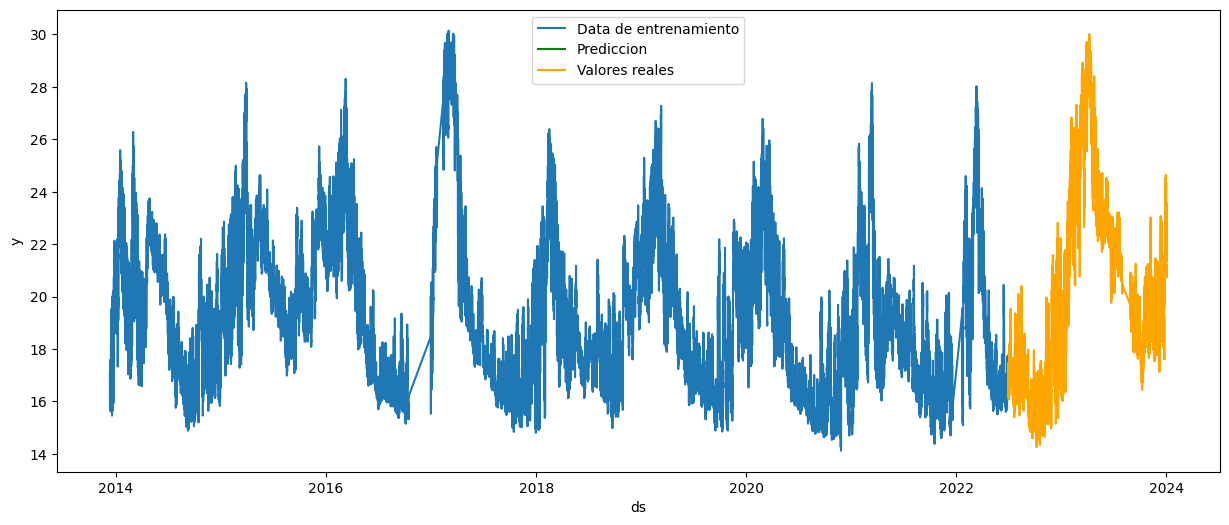

In [31]:
x_train_ticks = univariate_df.head(train_size)['ds']
y_train = univariate_df.head(train_size)['y']
x_test_ticks = univariate_df.tail(test_size)['ds']

#Ploteamos la grafica de la prediccion
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)
#Printeamos las curvas de interes
sns.lineplot(x=x_train_ticks, y=y_train, ax=ax, label='Data de entrenamiento') #navajowhite
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediccion') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Valores reales') #navajowhite
#damos los titulos de la grafica y de los ejes
ax.set_title(f'Prediccion con LSTME \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='T_agua', fontsize=14)

plt.show()